In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 9999


from datetime import datetime
str(datetime.now())




'2018-10-04 16:13:18.526886'

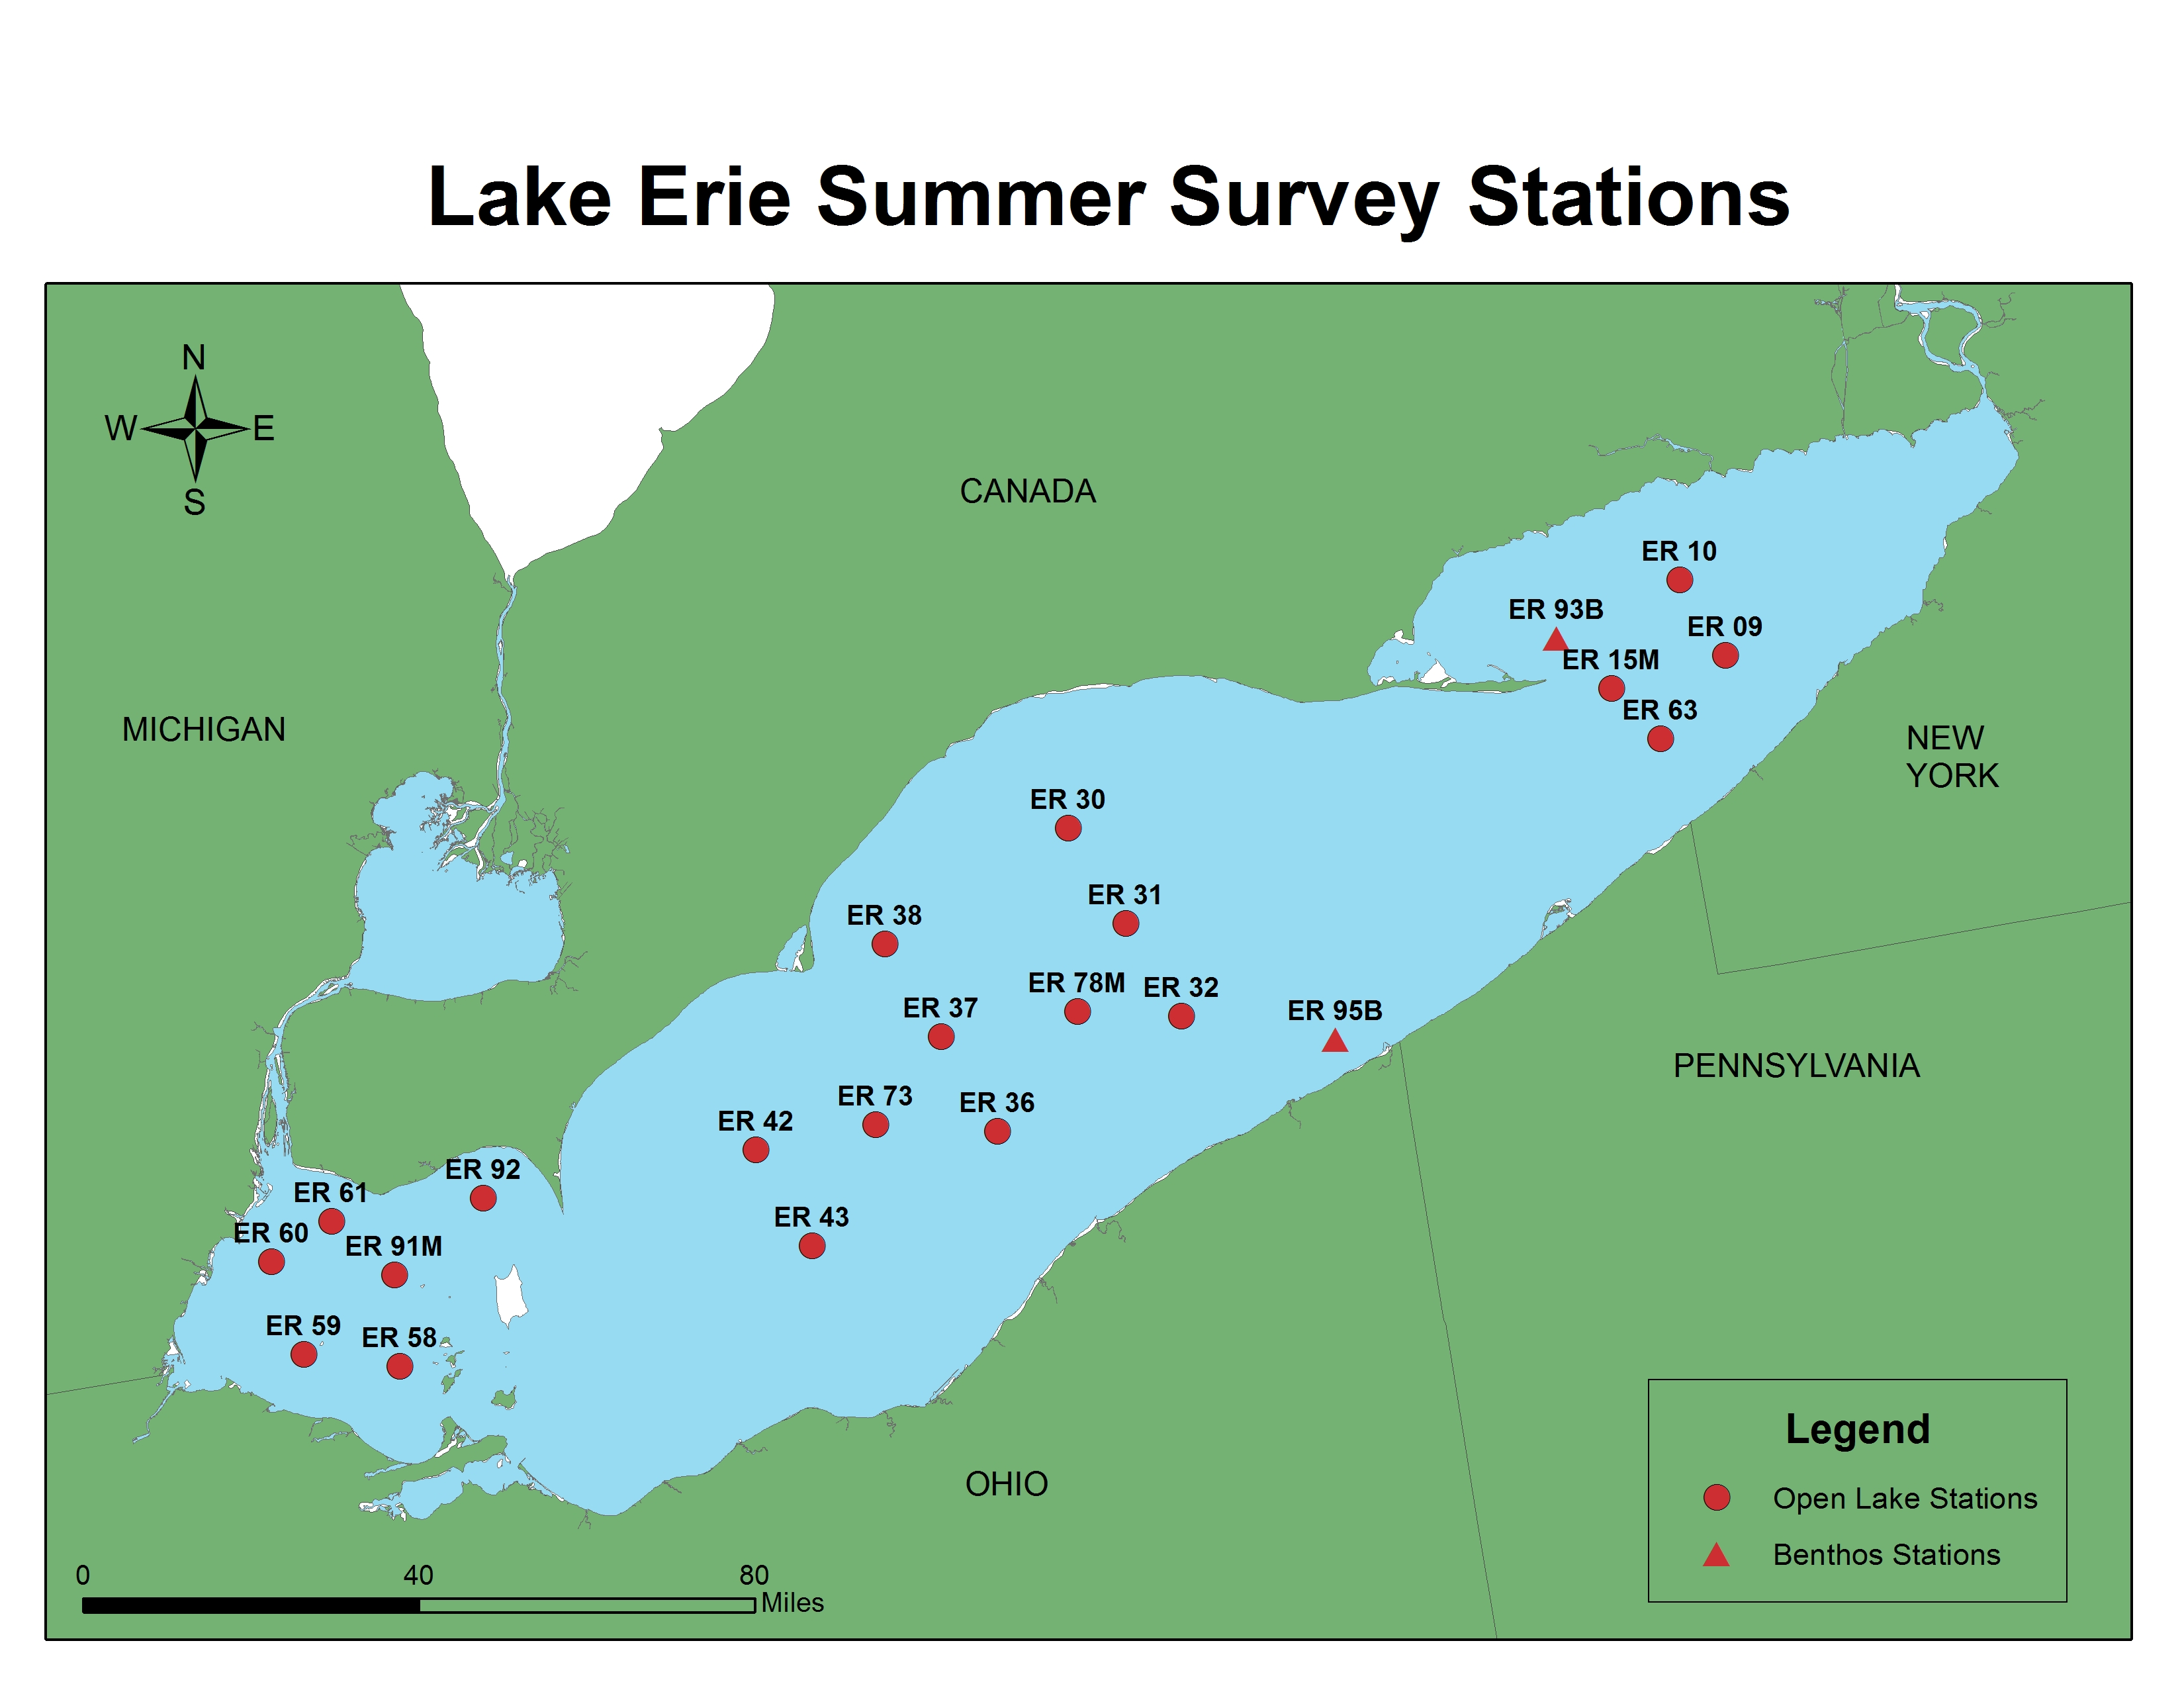

In [2]:
from IPython.display import Image
Image(filename='../../measurements/GLNPO/Erie_Summer_Survey2017.jpg') 

In [77]:
df = pd.read_csv('../../measurements/GLNPO/GLENDA TOTP.csv')

In [78]:
df.head()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,ANL_CODE_3,ANALYTE_3,VALUE_3,UNITS_3,FRACTION_3,METHOD_3,RESULT_REMARK_3,ANL_CODE_4,ANALYTE_4,VALUE_4,UNITS_4,FRACTION_4,METHOD_4,RESULT_REMARK_4,Unnamed: 47
0,1,2000,April,Spring,Erie,SP2000,E058A00,ER58,9.3,41.684917,-82.933833,2000/04/15 13:57,EDT,4.0,NaN,surface water,Individual QC,lab duplicate,00GC10C63,P-tot,"Phosphorus, Total as P",5.361,ug/l,Filtrate,LG204,NaN,P-tot,"Phosphorus, Total as P",20.727,ug/l,Total/Bulk,LG204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2000,April,Spring,Erie,SP2000,E059A00,ER59,7.9,41.727317,-83.150050,2000/04/15 12:35,EDT,4.0,NaN,surface water,Individual QC,field duplicate,00GC10D43,P-tot,"Phosphorus, Total as P",11.613,ug/l,Filtrate,LG204,NaN,P-tot,"Phosphorus, Total as P",33.167,ug/l,Total/Bulk,LG204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2000,April,Spring,Erie,SP2000,E061A00,ER61,9.1,41.946550,-83.045100,2000/04/15 08:43,EDT,2.0,NaN,surface water,Composite,routine field sample,00GC10I12,P-tot,"Phosphorus, Total as P",2.244,ug/l,Filtrate,LG204,NaN,P-tot,"Phosphorus, Total as P",23.764,ug/l,Total/Bulk,LG204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2000,April,Spring,Erie,SP2000,E060A00,ER60,8.3,41.891233,-83.197167,2000/04/15 11:11,EDT,2.0,NaN,surface water,Composite,routine field sample,00GC10I32,P-tot,"Phosphorus, Total as P",8.636,ug/l,Filtrate,LG204,NaN,P-tot,"Phosphorus, Total as P",20.933,ug/l,Total/Bulk,LG204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2000,April,Spring,Erie,SP2000,E059A00,ER59,7.9,41.727317,-83.150050,2000/04/15 12:35,EDT,2.0,NaN,surface water,Composite,routine field sample,00GC10I52,P-tot,"Phosphorus, Total as P",10.649,ug/l,Filtrate,LG204,NaN,P-tot,"Phosphorus, Total as P",33.800,ug/l,Total/Bulk,LG204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df.columns

Index(['Row', 'YEAR', 'MONTH', 'SEASON', 'LAKE', 'CRUISE_ID', 'VISIT_ID',
       'STATION_ID', 'STN_DEPTH_M', 'LATITUDE', 'LONGITUDE', 'SAMPLING_DATE',
       'TIME_ZONE', 'SAMPLE_DEPTH_M', 'DEPTH_CODE', 'MEDIUM', 'SAMPLE_TYPE',
       'QC_TYPE', 'SAMPLE_ID', 'ANL_CODE_1', 'ANALYTE_1', 'VALUE_1', 'UNITS_1',
       'FRACTION_1', 'METHOD_1', 'RESULT_REMARK_1', 'ANL_CODE_2', 'ANALYTE_2',
       'VALUE_2', 'UNITS_2', 'FRACTION_2', 'METHOD_2', 'RESULT_REMARK_2',
       'ANL_CODE_3', 'ANALYTE_3', 'VALUE_3', 'UNITS_3', 'FRACTION_3',
       'METHOD_3', 'RESULT_REMARK_3', 'ANL_CODE_4', 'ANALYTE_4', 'VALUE_4',
       'UNITS_4', 'FRACTION_4', 'METHOD_4', 'RESULT_REMARK_4', 'Unnamed: 47'],
      dtype='object')

In [80]:
df['VALUE_2'] = pd.to_numeric(df['VALUE_2'], errors='coerce')

In [81]:
df['VALUE_2'][df['VALUE_2']>0].count()

8717

In [82]:
df[df['VALUE_2']>0].groupby(['YEAR', 'MONTH'])['VALUE_2'].describe()

count       mean        std        min        25%        50%  \
YEAR MONTH                                                                     
1983 April       81.0  12.846914   6.146912   3.000000  10.000000  11.500000   
     August     144.0  11.711806   6.480929   3.300000   7.500000   9.500000   
     May         40.0  19.730000  17.166772   3.000000  12.000000  13.000000   
     October     81.0  20.739506  12.313475   3.800000  11.400000  19.800000   
1984 April       77.0  15.635065   5.893524   9.500000  12.000000  13.500000   
     August     147.0  10.706122   4.555852   4.500000   7.000000   9.700000   
     December    88.0  18.987500   6.089747   9.300000  13.600000  19.250000   
     February    16.0  15.912500   9.896253   3.000000  11.000000  14.000000   
     May         39.0  26.246154  23.508295  13.000000  14.900000  16.500000   
1985 April      141.0  14.479433   4.196232   9.800000  11.900000  12.900000   
     August     217.0  14.123963  22.330949   2.100000   6.400000   8.300000   
     February    18.0   9.811111   2.323256   3.600000   8.875000  10.400000   
     January     17.0  25.047059  11.880558   9.800000  17.600000  21.000000   
     November   115.0  21.012174   7.822831   9.400000  15.900000  20.000000   
1986 April      136.0  12.922794   5.396953   6.900000   9.900000  11.700000   
     August     208.0  10.730769   5.271784   3.700000   7.800000   8.750000   
1987 April      232.0  14.380172   7.867311   7.600000   9.500000  11.400000   
     August     130.0   8.420000   6.829569   2.100000   4.725000   6.100000   
     July        67.0   8.267164   4.806699   3.500000   5.150000   6.600000   
1988 April      139.0   9.897122   4.659072   6.100000   7.600000   8.200000   
     August     209.0  10.170335   8.106407   3.300000   5.600000   7.200000   
1989 August     211.0  10.115166   7.262405   0.700000   6.000000   7.200000   
1990 April      134.0   8.742537   4.063969   5.000000   6.400000   7.400000   
     August     207.0  11.499034   8.747826   3.500000   5.950000   8.200000   
1991 April      136.0  16.154412   9.703782   5.400000   9.875000  11.650000   
     August     210.0   7.421429   4.040757   2.300000   5.025000   6.100000   
1992 April      136.0  11.108824   3.300628   5.000000   9.975000  10.950000   
1993 April      136.0  15.797794  19.583498   4.400000   9.075000  10.700000   
1996 April      208.0  15.427187   9.298607   0.167000  10.067500  12.115000   
     August     137.0   7.501613   3.245146   0.579000   5.670000   6.634000   
1997 April      203.0  20.565975  13.739729   0.086000  11.977000  15.731000   
     August     121.0   7.377529   5.293883   0.009000   4.336000   5.901000   
1998 April      104.0  13.611077   8.135770   0.587000   9.093000  10.399000   
     August     132.0   6.351515   3.092085   0.700000   4.300000   5.400000   
1999 August     145.0   8.459841   5.811593   0.092400   4.490800   6.647000   
     March      102.0  17.344118  18.366002   0.300000  11.500000  12.950000   
2000 April      103.0   9.682932   7.552251   0.045000   5.753500   7.102000   
     August     133.0   8.495278   5.351317   3.016000   5.430000   6.221000   
2001 April      108.0  14.652084  12.945511   0.058643   7.283541  10.094743   
     August     141.0   7.123505   3.658514   0.401287   4.311985   6.207084   
2002 April      200.0  18.668218   8.638825   0.080065  13.262393  16.964274   
     August     122.0  13.146444  21.028598   2.011082   4.916260   5.962842   
2003 April      204.0  26.979619  31.179631   0.082722   9.805060  18.225183   
     August     119.0   8.107815   4.320846   0.170013   5.766402   6.869756   
2004 April       96.0  12.063537   5.151209   0.115168   9.507096  11.124807   
     August     106.0   9.158407   8.082755   0.315425   4.343662   5.967560   
2005 April      137.0  13.804672   8.547672   0.080000   8.270000  10.460000   
     August     111.0   8.444811   5.987872   0.090000   4.353000   6.033000   
2006 April      

In [83]:
df[df['VALUE_2']>0].groupby(['YEAR', 'MONTH'])['VALUE_2'].describe().to_csv('lake_erie_glenda_TOTP_ugP_L.csv')

In [84]:
df['MONTH'].unique()

array(['April    ', 'August   ', 'May      ', 'October  ', 'December ',
       'February ', 'November ', 'January  ', 'July     ', 'March    '],
      dtype=object)

In [85]:
df[df['MONTH']=='April'].head()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,ANL_CODE_3,ANALYTE_3,VALUE_3,UNITS_3,FRACTION_3,METHOD_3,RESULT_REMARK_3,ANL_CODE_4,ANALYTE_4,VALUE_4,UNITS_4,FRACTION_4,METHOD_4,RESULT_REMARK_4,Unnamed: 47


In [86]:
df[df['VALUE_2']>0][df['MONTH']=='April    '].groupby(['YEAR', 'MONTH'])['VALUE_2'].describe()['mean'].to_csv('LE_april.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Text(0.5,0,'Year')

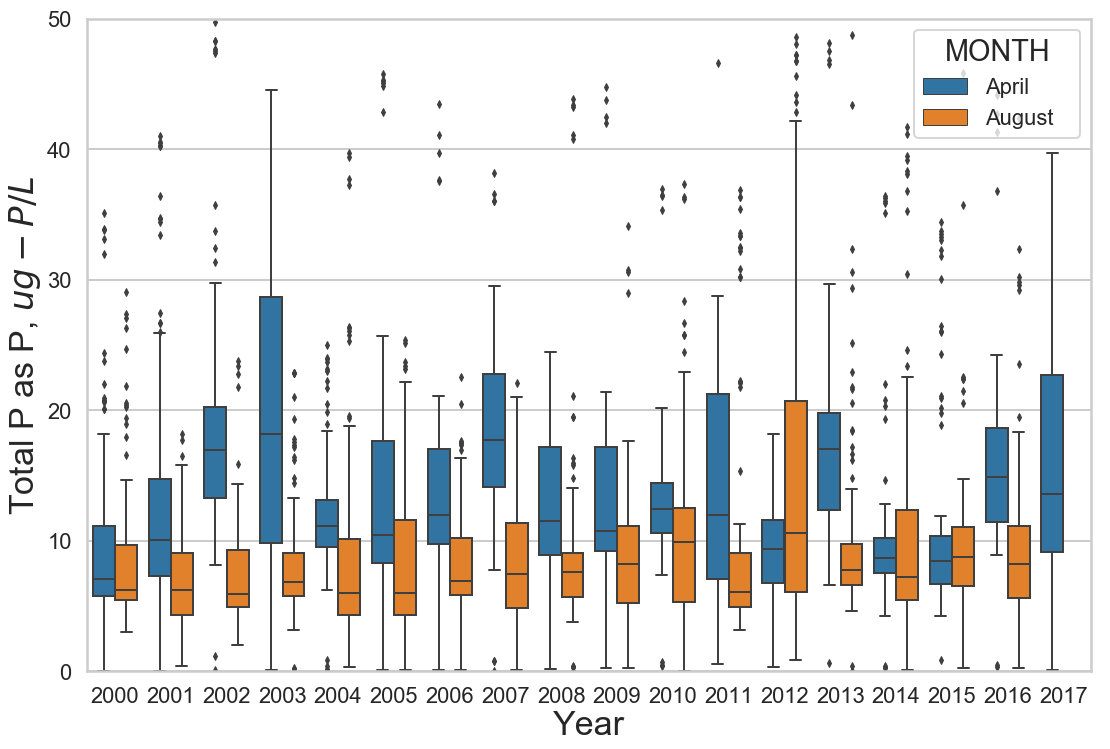

In [87]:
sns.boxplot(x='YEAR', y='VALUE_2', hue='MONTH', data=df[(df['VALUE_2']>0) & (df['YEAR']>1999)])
plt.ylim(0,50)
plt.ylabel('Total P as P, $ug-P/L$')
plt.xlabel('Year')

In [88]:
western_basin = ['ER58', 'ER59', 'ER60', 'ER61', 'ER91M', 'ER92']
central_basin = ['ER42', 'ER43', 'ER73', 'ER37', 'ER36', 'ER38', 'ER78M', 'ER30', 'ER31', 'ER32', 'ER95B']
eastern_basin = ['ER93B', 'ER15M', 'ER63', 'ER09', 'ER10']

In [91]:
df[(df['VALUE_2']>0) & (df['STATION_ID'].isin(western_basin))].groupby(['YEAR'])['VALUE_2'].describe().to_csv('LE_WB.csv')

In [16]:
df[(df['VALUE_2']>0) & (df['STATION_ID'].isin(western_basin))].groupby(['YEAR', 'MONTH'])['VALUE_2'].describe().to_csv('western_basin_glenda_TOTP_ugP_L.csv')

Text(0.5,0,'Year')

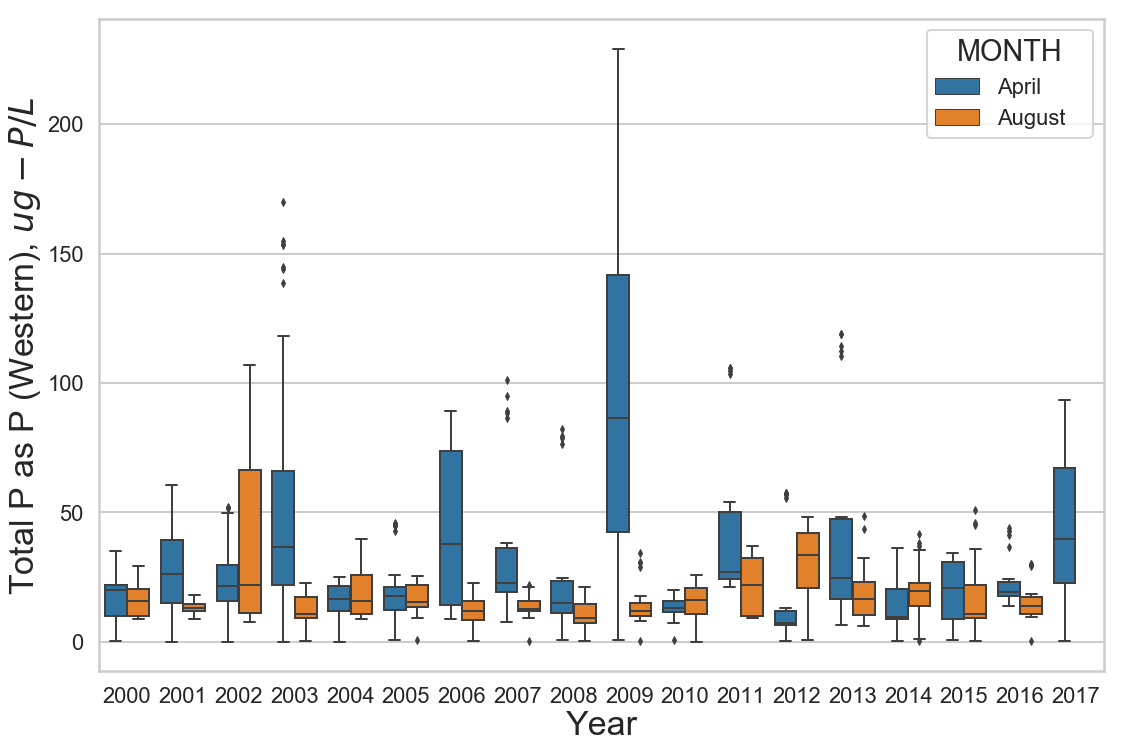

In [17]:
sns.boxplot(x='YEAR', y='VALUE_2', hue='MONTH', data=df[(df['VALUE_2']>0) & (df['STATION_ID'].isin(western_basin)) & (df['YEAR']>1999)] )
# plt.ylim(0,50)
plt.ylabel('Total P as P (Western), $ug-P/L$')
plt.xlabel('Year')

In [18]:
df[(df['VALUE_2']>0) & (df['STATION_ID'].isin(central_basin))].groupby(['YEAR', 'MONTH'])['VALUE_2'].describe().to_csv('central_basin_glenda_TOTP_ugP_L.csv')

Text(0.5,0,'Year')

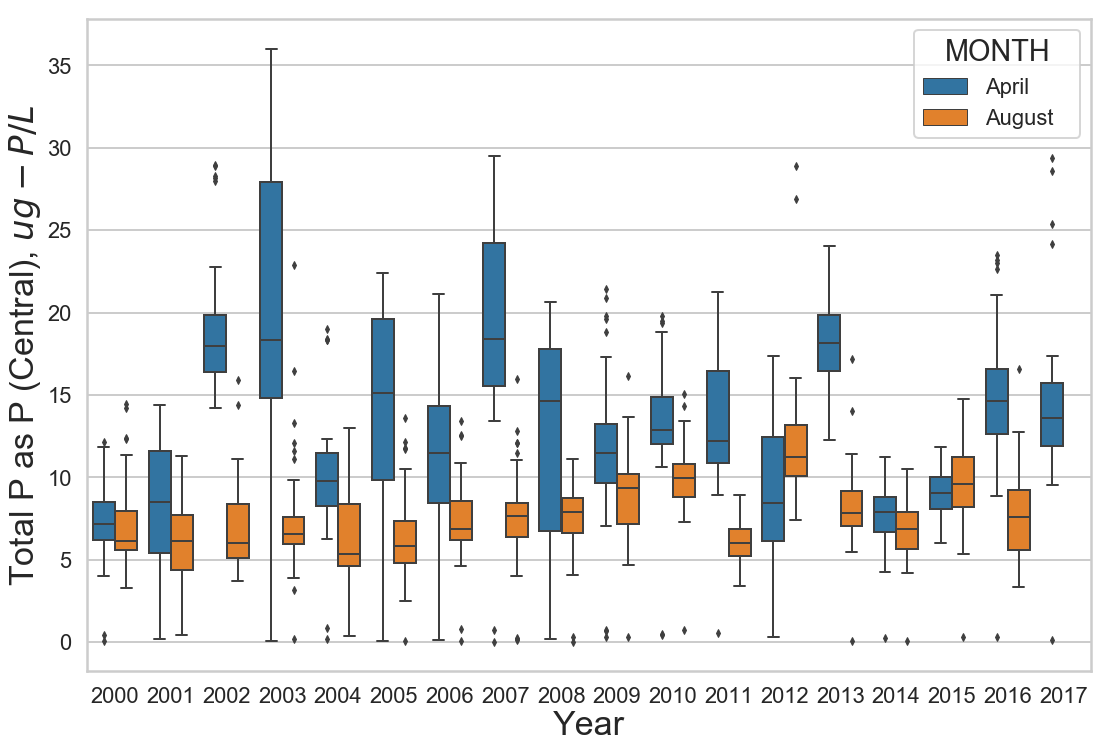

In [19]:
sns.boxplot(x='YEAR', y='VALUE_2', hue='MONTH', data=df[(df['VALUE_2']>0) & (df['STATION_ID'].isin(central_basin)) & (df['YEAR']>1999)] )
# plt.ylim(0,50)
plt.ylabel('Total P as P (Central), $ug-P/L$')
plt.xlabel('Year')

In [20]:
df[(df['VALUE_2']>0) & (df['STATION_ID'].isin(eastern_basin))].groupby(['YEAR', 'MONTH'])['VALUE_2'].describe().to_csv('eastern_basin_glenda_TOTP_ugP_L.csv')

Text(0.5,0,'Year')

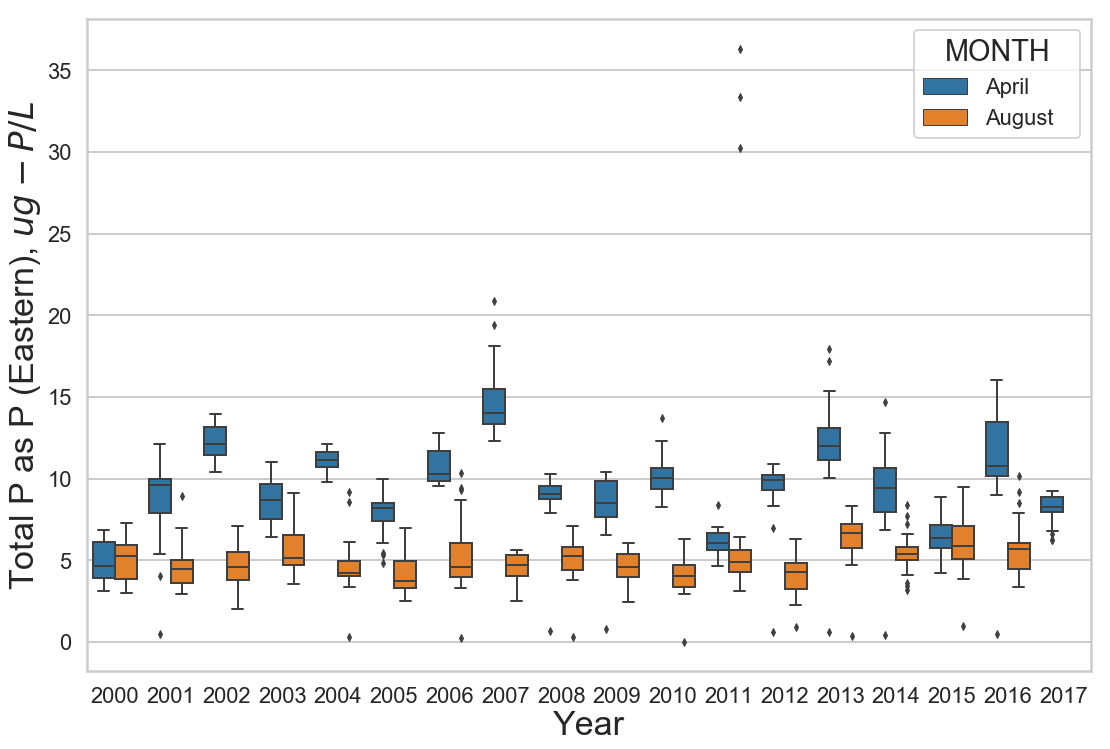

In [21]:
sns.boxplot(x='YEAR', y='VALUE_2', hue='MONTH', data=df[(df['VALUE_2']>0) & (df['STATION_ID'].isin(eastern_basin)) & (df['YEAR']>1999)] )
# plt.ylim(0,50)
plt.ylabel('Total P as P (Eastern), $ug-P/L$')
plt.xlabel('Year')

### Chl-a

In [22]:
df = pd.read_csv('../../measurements/GLNPO/GLENDA CHLA.csv')

In [23]:
df.tail()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,Unnamed: 33
8569,8570,1999,August,Summer,Erie,NaN,E010G99,ER10,34.1,42.67883,-79.69460,1999/08/07 01:42,EDT,24.0,Mid Hypolimnion,surface water,Individual,routine field sample,99GC43S86,Chlor-a,Chlorophyll-a,0.22,ug/l,Residue,LG405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8570,8571,1999,August,Summer,Erie,NaN,E010G99,ER10,34.1,42.67883,-79.69460,1999/08/07 01:42,EDT,31.2,Bottom Minus,surface water,Individual,routine field sample,99GC43S91,Chlor-a,Chlorophyll-a,0.15,ug/l,Residue,LG405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8571,8572,1999,August,Summer,Erie,NaN,E93BG99,ER93B,42.4,42.61833,-80.01150,1999/08/06 14:45,EDT,20.0,NaN,surface water,Composite,routine field sample,99GC44I12,Chlor-a,Chlorophyll-a,0.92,ug/l,Residue,LG405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8572,8573,1999,August,Summer,Erie,NaN,E95BG99,ER95B,16.8,43.00000,-80.66683,1999/08/06 04:48,EDT,20.0,NaN,surface water,Composite,routine field sample,99GC44I32,Chlor-a,Chlorophyll-a,0.56,ug/l,Residue,LG405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8573,8574,1999,August,Summer,Erie,NaN,E95BG99,ER95B,16.8,43.00000,-80.66683,1999/08/06 04:48,EDT,14.5,Deep Chlorophyll Layer,surface water,Individual,routine field sample,99GC44S25,Chlor-a,Chlorophyll-a,0.56,ug/l,Residue,LG405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df['VALUE_1'] = pd.to_numeric(df['VALUE_1'], errors='coerce')

In [25]:
df[df['VALUE_1']>0].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe()

count       mean       std       min       25%       50%  \
YEAR MONTH                                                                 
1983 April       82.0   4.175610  2.175598  1.400000  2.200000  4.250000   
     August     141.0   2.686525  2.253576  0.100000  1.400000  2.100000   
     May         40.0   2.774000  1.224939  0.840000  1.575000  3.000000   
     October     81.0   4.181481  2.551623  0.700000  2.200000  3.400000   
1984 April       78.0   1.421154  1.203985  0.300000  0.625000  0.950000   
     August     148.0   2.838514  2.108277  0.200000  1.500000  2.600000   
     December    85.0   5.087059  3.854428  0.800000  2.000000  4.000000   
     February    16.0   0.987500  0.543906  0.300000  0.600000  0.800000   
     May         38.0   1.968421  1.643514  0.600000  0.800000  1.700000   
1985 April      141.0   2.392979  2.239437  0.200000  0.700000  1.800000   
     August     216.0   3.292130  3.613505  0.100000  1.275000  2.500000   
     February    18.0   1.821111  0.833687  0.530000  1.095000  1.900000   
     January     17.0   3.402353  1.741474  1.320000  1.900000  3.340000   
     November   115.0   1.994435  1.085237  0.300000  1.100000  1.900000   
1986 April      139.0   4.627554  4.536073  0.300000  1.400000  2.900000   
     August     207.0   4.763623  4.517766  0.200000  2.100000  3.400000   
1987 April      238.0   4.556303  2.964125  0.600000  2.462500  3.900000   
     August     129.0   3.894574  4.469153  0.100000  1.500000  2.400000   
     July        73.0   3.756164  2.087927  1.500000  2.400000  2.900000   
1988 April      138.0   4.037681  3.447960  0.470000  1.680000  2.895000   
     August     113.0   2.565664  3.012912  0.170000  1.060000  1.690000   
1989 August     211.0   8.871517  6.853094  0.570000  4.485000  6.630000   
1990 April      134.0   1.751642  1.342081  0.460000  1.030000  1.255000   
     August     209.0   0.561770  0.418589  0.010000  0.310000  0.500000   
1991 April      136.0   4.620956  2.905400  0.700000  2.575000  3.845000   
     August     209.0   3.887847  2.581655  0.250000  2.410000  3.400000   
1992 April      136.0   3.681618  2.796538  0.100000  1.575000  2.650000   
1993 April      136.0   2.097059  2.583880  0.100000  0.475000  0.900000   
1996 April      208.0   4.439904  3.116916  0.100000  1.375000  4.400000   
     August     133.0   0.932331  0.693427  0.100000  0.500000  0.700000   
1997 April      204.0   1.404551  1.253725  0.023533  0.519455  0.927771   
     August     140.0   1.663407  1.677210  0.011619  0.653576  1.137192   
1998 April      104.0   1.989756  1.571477  0.032933  0.691667  1.326667   
     August     134.0   1.148853  0.801171  0.021800  0.678333  1.040000   
1999 August     149.0   1.668424  1.751961  0.025130  0.820000  1.070000   
     March      103.0   1.483107  1.036976  0.060000  0.410000  1.410000   
2000 April      103.0   1.097767  0.865171  0.030000  0.605000  0.950000   
     August     135.0   2.753111  1.814339  0.060000  1.710000  2.450000   
2001 April      109.0   4.738505  3.194234  0.001000  2.726000  3.810000   
     August     144.0   2.949717  2.520215  0.001300  1.525025  2.236650   
2002 April      208.0   1.699894  2.026075  0.003000  0.437250  0.967000   
     August     126.0   3.020032  2.838751  0.002000  1.554750  2.153000   
2003 April      203.0   5.697256  4.135709  0.003000  2.810000  4.547000   
     August     120.0   2.912783  2.386368  0.004000  1.626750  2.287000   
2004 April      104.0   3.246705  2.758885  0.003000  1.236750  2.746500   
     August     106.0   2.601264  1.968257  0.002000  1.410250  2.017000   
2005 April      138.0   7.114804  6.906650  0.008000  1.396500  2.840000   
     August     120.0   3.423900  3.638129  0.009000  1.680000  2.396500   
2006 April      108.0   2.903410  2.010847  0.002133  1.155000  2.450000   
     August     118.0   3.963469  4.532581  0.006870  1.862500  2.620000   
2007 April      108.0  11.409167  8.167738  0.050000  3.820000  

(0, 51.23995)

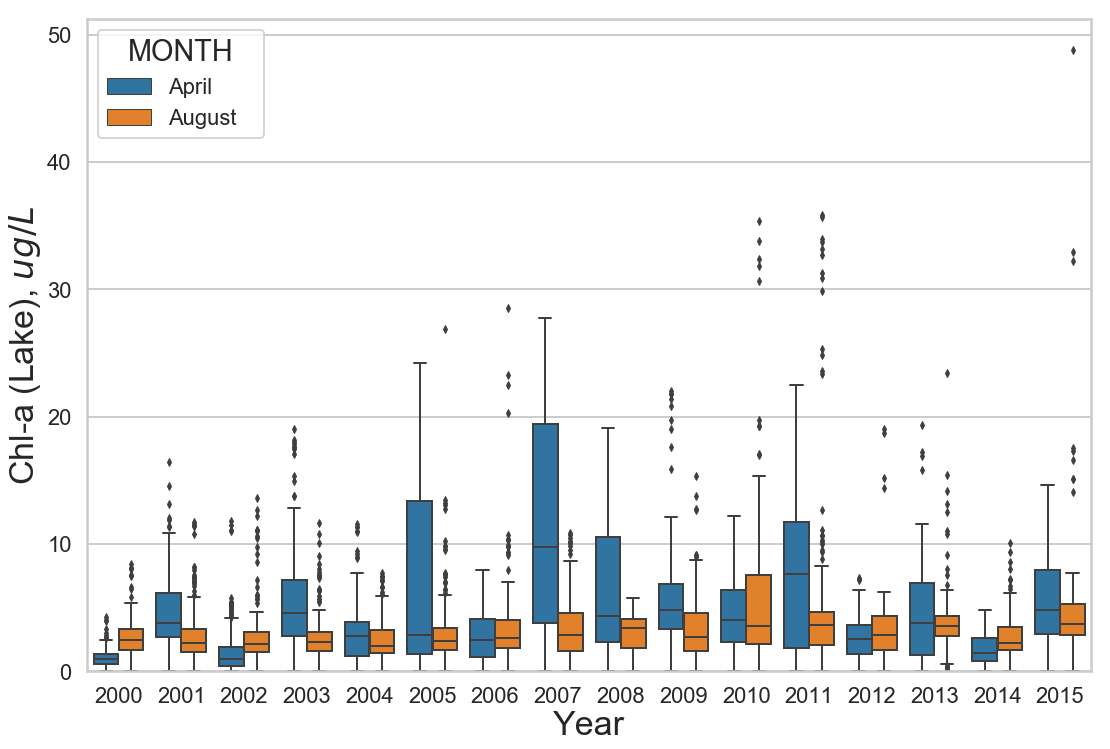

In [26]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999)] )
# plt.ylim(0,50)
plt.ylabel('Chl-a (Lake), $ug/L$')
plt.xlabel('Year')
plt.ylim(0,None)

In [27]:
df[df['VALUE_1']>0].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('lake_erie_glenda_Chla_ug_L.csv')

In [28]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(western_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe()

count       mean        std       min        25%        50%  \
YEAR MONTH                                                                    
1983 April        6.0   5.600000   1.951410  3.100000   4.225000   5.500000   
     August       6.0   6.450000   3.953606  0.200000   4.100000   8.500000   
     May          3.0   0.886667   0.080829  0.840000   0.840000   0.840000   
     October      4.0   2.800000   0.852447  2.100000   2.250000   2.550000   
1984 April        4.0   4.425000   1.475071  3.100000   3.175000   4.400000   
     August       5.0   7.140000   1.786897  4.400000   7.100000   7.300000   
     December     4.0   6.225000   0.602080  5.700000   5.775000   6.100000   
     May          1.0   4.900000        NaN  4.900000   4.900000   4.900000   
1985 April        7.0   3.811429   2.578290  1.800000   1.850000   2.300000   
     August       6.0   7.066667   4.787762  2.100000   3.325000   6.050000   
     November     4.0   0.817500   0.131244  0.700000   0.737500   0.785000   
1986 April       35.0   9.943429   5.175792  1.900000   6.385000  10.400000   
     August      34.0  13.072647   5.255212  2.670000   8.300000  13.850000   
1987 April       54.0   8.288889   2.552906  4.000000   6.700000   8.100000   
     August      18.0  14.050000   3.393636  7.200000  11.925000  15.500000   
     July        18.0   6.116667   2.603448  2.600000   4.700000   5.600000   
1988 April       35.0   8.026286   4.229550  1.380000   4.710000   7.870000   
     August      18.0   7.998333   4.265264  2.070000   6.330000   7.675000   
1989 August      36.0  18.261944   7.461286  5.060000  11.685000  18.330000   
1990 April       34.0   2.822353   2.150446  0.680000   0.892500   2.130000   
     August      35.0   1.042000   0.633681  0.420000   0.565000   0.730000   
1991 April       36.0   6.046111   3.568908  1.400000   3.725000   5.085000   
     August      36.0   6.272222   3.707033  0.900000   3.550000   5.735000   
1992 April       36.0   4.158333   3.119283  1.300000   1.800000   2.600000   
1993 April       36.0   1.283333   1.463948  0.100000   0.400000   0.650000   
1996 April       55.0   3.712727   2.014765  0.100000   1.600000   4.100000   
     August      29.0   1.593103   0.951289  0.100000   1.000000   1.400000   
1997 April       55.0   1.000021   0.947043  0.023533   0.409327   0.676416   
     August      27.0   4.090563   2.259048  0.755344   2.408290   3.676010   
1998 April       29.0   2.489046   1.869911  0.045667   0.940000   1.966667   
     August      27.0   2.214570   1.020132  0.033400   1.520000   2.133333   
1999 August      27.0   4.537037   2.403705  0.170000   3.330000   3.820000   
     March       28.0   1.772857   1.162366  0.060000   0.747500   1.500000   
2000 April       29.0   1.651379   1.259979  0.040000   0.650000   1.310000   
     August      27.0   4.320370   2.531716  0.200000   2.505000   4.170000   
2001 April       34.0   3.341412   2.143353  0.016000   1.719750   2.731000   
     August      28.0   6.909700   2.775467  0.005300   4.624975   7.000000   
2002 April       58.0   2.790672   2.991349  0.004000   0.702000   1.363000   
     August      28.0   6.873750   3.658898  0.018000   4.368000   5.950000   
2003 April       56.0   3.545625   1.577687  0.017000   2.574750   3.580000   
     August      27.0   6.368593   2.636929  0.096000   5.123500   6.367000   
2004 April       29.0   2.057011   1.243430  0.003000   1.060000   1.833000   
     August      28.0   5.127607   1.860335  0.017000   3.782000   5.213500   
2005 April       33.0   3.987879   3.675207  0.033000   1.427000   2.327000   
     August      29.0   6.911759   3.832395  0.012000   5.880000   7.000000   
2006 April       29.0   2.654115   1.659958  0.002667   1.100000   2.746667   
     August      28.0   8.674689   6.787635  0.061300   4.425000   6.685000   
2007 April       29.0   7.665172   6.765520  0.140000   3.550000   5.680000   
     August      29.0   7.435517   2.837478  0.040000   7.140000  

### Eastern

(0, 51.239866666649995)

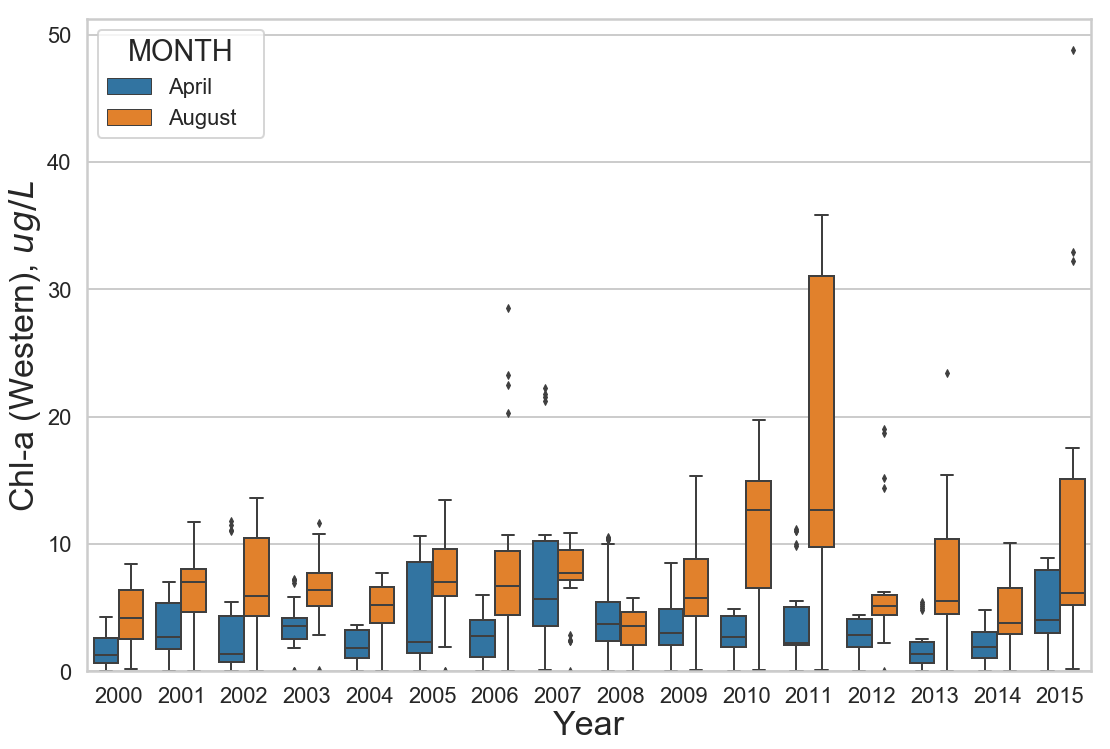

In [29]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999)& (df['STATION_ID'].isin(western_basin))] )
# plt.ylim(0,50)
plt.ylabel('Chl-a (Western), $ug/L$')
plt.xlabel('Year')
plt.ylim(0,None)

In [30]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(western_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('western_glenda_Chla_ug_L.csv')

(0, 29.11645)

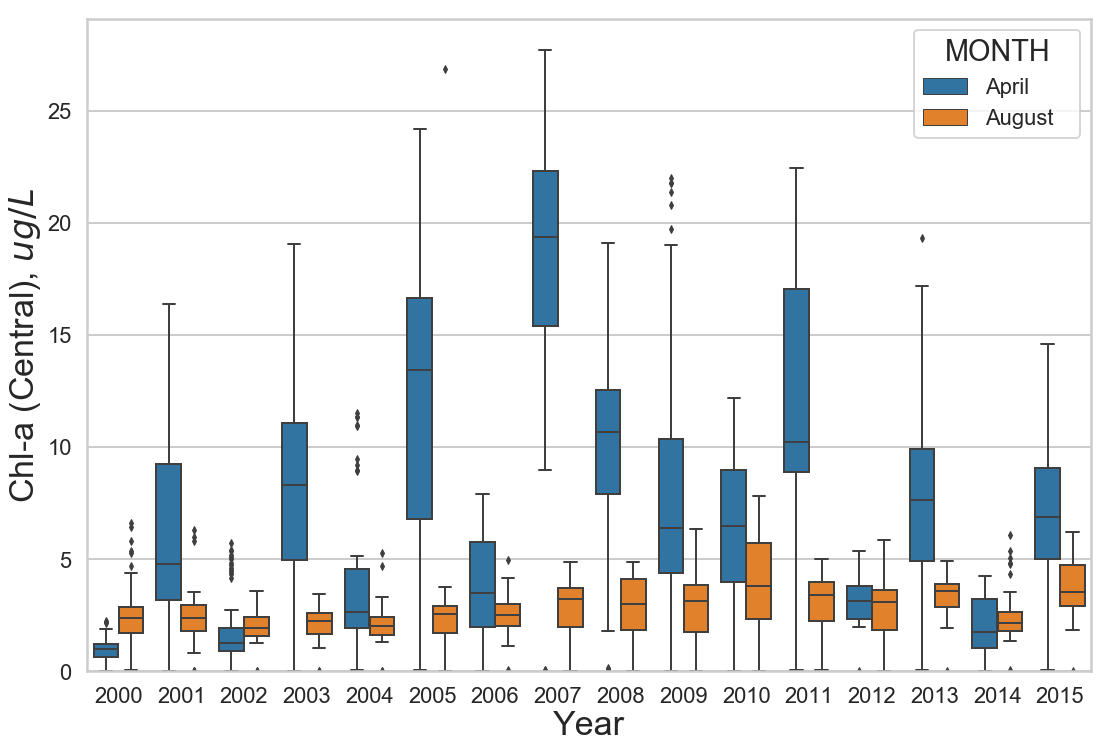

In [31]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999)& (df['STATION_ID'].isin(central_basin))] )
# plt.ylim(0,50)
plt.ylabel('Chl-a (Central), $ug/L$')
plt.xlabel('Year')
plt.ylim(0,None)

In [32]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(central_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('central_glenda_Chla_ug_L.csv')

(0, 10.8464)

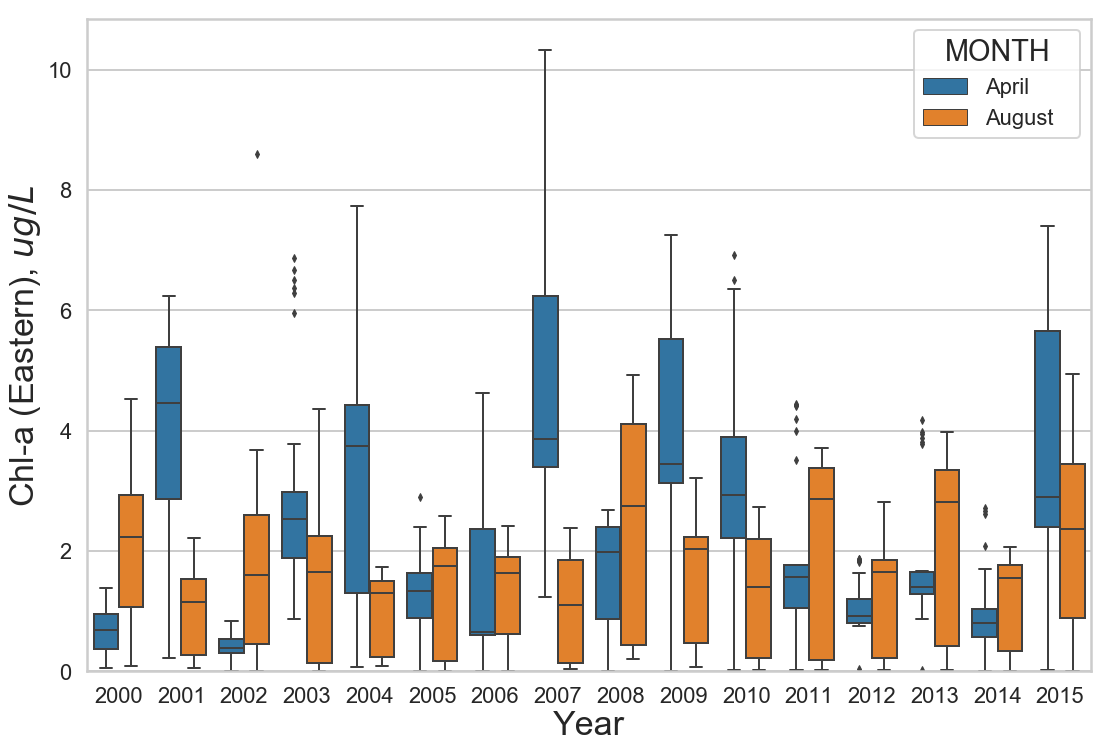

In [33]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999)& (df['STATION_ID'].isin(eastern_basin))] )
# plt.ylim(0,50)
plt.ylabel('Chl-a (Eastern), $ug/L$')
plt.xlabel('Year')
plt.ylim(0,None)

In [34]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(eastern_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('eastern_glenda_Chla_ug_L.csv')

### Chloride

In [35]:
df = pd.read_csv('../../measurements/GLNPO/GLENDA Cl.csv')

In [36]:
df.tail()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,Unnamed: 33
8835,8836,1999,August,Summer,Erie,NaN,E010G99,ER10,34.1,42.67883,-79.6946,1999/08/07 01:42,EDT,13.9,Lower Epilimnion,surface water,Individual,routine field sample,99GC43S83,Cl-,Chloride,15.7333,mg/l,Filtrate,LG205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8836,8837,1999,August,Summer,Erie,NaN,E010G99,ER10,34.1,42.67883,-79.6946,1999/08/07 01:42,EDT,16.0,Thermocline,surface water,Individual,routine field sample,99GC43S84,Cl-,Chloride,15.7550,mg/l,Filtrate,LG205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8837,8838,1999,August,Summer,Erie,NaN,E010G99,ER10,34.1,42.67883,-79.6946,1999/08/07 01:42,EDT,18.9,Deep Chlorophyll Layer,surface water,Individual,routine field sample,99GC43S85,Cl-,Chloride,15.5489,mg/l,Filtrate,LG205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8838,8839,1999,August,Summer,Erie,NaN,E010G99,ER10,34.1,42.67883,-79.6946,1999/08/07 01:42,EDT,24.0,Mid Hypolimnion,surface water,Individual,routine field sample,99GC43S86,Cl-,Chloride,15.7189,mg/l,Filtrate,LG205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8839,8840,1999,August,Summer,Erie,NaN,E010G99,ER10,34.1,42.67883,-79.6946,1999/08/07 01:42,EDT,31.2,Bottom Minus,surface water,Individual,routine field sample,99GC43S91,Cl-,Chloride,15.7624,mg/l,Filtrate,LG205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df['VALUE_1'] = pd.to_numeric(df['VALUE_1'], errors='coerce')

In [38]:
df[(df['VALUE_1']>0)].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe()

count       mean       std        min        25%        50%  \
YEAR MONTH                                                                    
1983 April       82.0  16.075610  2.437594   9.800000  15.300000  15.900000   
     August     145.0  14.291724  1.889757   8.600000  14.300000  14.800000   
     May         39.0  15.135897  2.732503   7.900000  15.050000  15.700000   
     October     81.0  14.291358  2.326596   6.300000  14.500000  15.000000   
1984 April       76.0  15.106579  1.091462  13.900000  14.400000  14.850000   
     August     149.0  15.527517  3.810403   7.900000  14.700000  15.000000   
     December    86.0  14.386047  1.712594   7.600000  14.800000  14.900000   
     February    16.0  15.912500  6.429813   7.700000  14.550000  14.950000   
     May         39.0  15.282051  0.881348  13.900000  14.700000  15.400000   
1985 April      141.0  14.439362  1.508862   7.400000  14.400000  14.700000   
     August     218.0  14.217385  1.624960   7.500000  14.400000  14.700000   
     February    18.0  13.466667  2.062266   9.100000  12.125000  14.500000   
     January     17.0  15.852941  1.977725  11.300000  16.400000  16.500000   
     November   115.0  14.172609  1.634379   7.800000  14.200000  14.600000   
1986 April      137.0  14.280876  2.109718   8.400000  14.200000  14.700000   
     August     208.0  13.674375  1.873390   7.000000  13.795000  14.340000   
1987 April      226.0  14.097566  2.200577   8.000000  13.412500  14.300000   
     August     131.0  13.656489  1.809892   8.300000  13.600000  14.200000   
     July        75.0  13.173333  2.829494   7.900000  12.600000  13.400000   
1988 April      136.0  13.442647  1.687893   8.200000  13.275000  14.100000   
     August     210.0  13.711905  2.856739   7.800000  13.000000  14.100000   
1989 August     211.0  13.336967  1.429238   8.700000  13.500000  13.900000   
1990 April      134.0  14.421642  2.022556   7.700000  13.900000  14.450000   
     August     210.0  13.782381  1.684754   7.400000  13.800000  14.300000   
1991 April      136.0  14.483824  1.636402   7.400000  14.375000  14.600000   
     August     210.0  13.646667  1.953775   7.000000  14.000000  14.300000   
1992 April      136.0  14.555882  2.145720   8.300000  14.200000  14.600000   
1993 April      136.0  14.941912  2.925838   8.500000  14.000000  14.600000   
1996 April      210.0  14.234581  3.910026   0.014000  14.057250  14.475000   
     August     137.0  13.331423  3.468212   0.023000  11.269000  14.842000   
1997 April      205.0  14.537854  4.062763   0.003000  14.464000  14.838000   
     August     121.0  13.416752  3.105332   0.057000  14.175000  14.454000   
1998 April      103.0  13.469049  3.434591   0.042000  12.920000  14.236000   
     August     132.0  13.575758  2.678758   0.100000  14.100000  14.600000   
1999 August     143.0  14.156549  2.343105   0.004100  14.545850  15.025200   
     March       99.0  15.761616  3.481869  11.400000  14.500000  15.000000   
2000 April      101.0  15.243168  2.696970   0.090000  15.140000  15.400000   
     August     135.0  14.368815  2.489613   0.010000  14.860000  15.160000   
2001 April      104.0  15.705748  2.525741   0.022152  15.407150  15.955291   
     August     143.0  15.037803  3.307960   0.023411  15.772580  16.353529   
2002 April      201.0  15.411682  3.019872   0.030718  15.723483  16.149332   
     August     122.0  14.667508  3.044361   0.021407  14.528483  16.005854   
2003 April      206.0  16.999327  7.852547   0.000912  14.727849  15.773539   
     August     119.0  15.014369  2.853535   0.041891  15.253966  15.872699   
2004 April       96.0  15.565446  3.822724   0.008020  15.038023  16.518585   
     August     107.0  15.085213  4.030295   0.000841  14.430054  16.587103   
2005 April      139.0  16.318213  4.612485   0.001765  16.697256  17.168922   
     August     114.0  14.869798  4.266722   0.096000  13.899750  16.729000   
2006 April      108.0  16.108472  4.387729   0.093000  15.564750  

(0, 53.33470795)

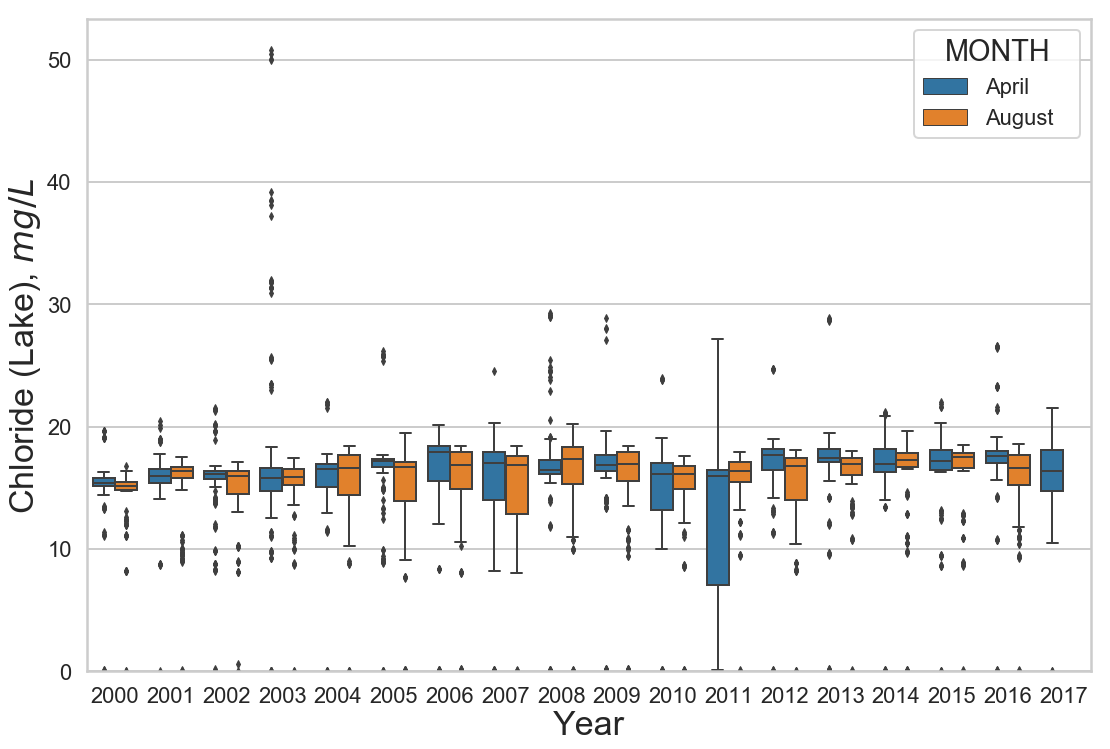

In [39]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999)] )
# plt.ylim(0,50)
plt.ylabel('Chloride (Lake), $mg/L$')
plt.xlabel('Year')
plt.ylim(0,None)

In [40]:
df[(df['VALUE_1']>0)].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('lake_glenda_Cl_mg_L.csv')

(0, 53.33470795)

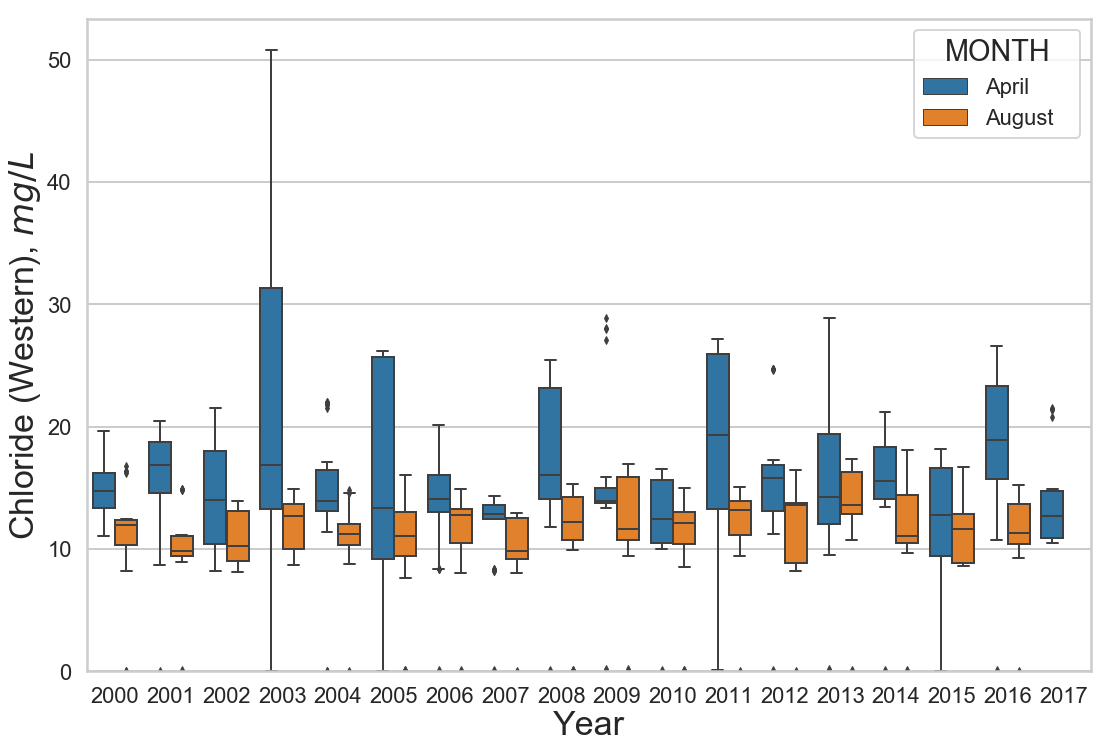

In [41]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['STATION_ID'].isin(western_basin))] )
# plt.ylim(0,50)
plt.ylabel('Chloride (Western), $mg/L$')
plt.xlabel('Year')
plt.ylim(0,None)

In [42]:
df[(df['VALUE_1']>0)& (df['STATION_ID'].isin(western_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('western_glenda_Cl_mg_L.csv')

(12, 20)

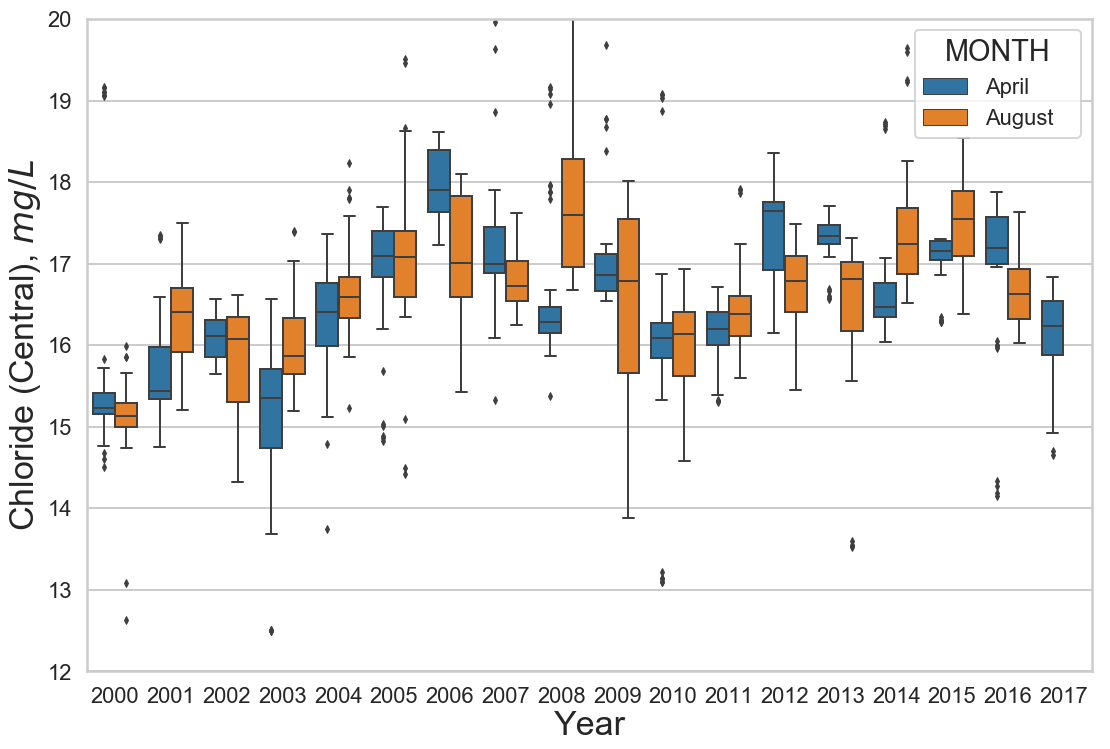

In [43]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['STATION_ID'].isin(central_basin))] )
# plt.ylim(0,50)
plt.ylabel('Chloride (Central), $mg/L$')
plt.xlabel('Year')
plt.ylim(12,20)

In [44]:
df[(df['VALUE_1']>0)& (df['STATION_ID'].isin(central_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('central_glenda_Cl_mg_L.csv')

(12, 20)

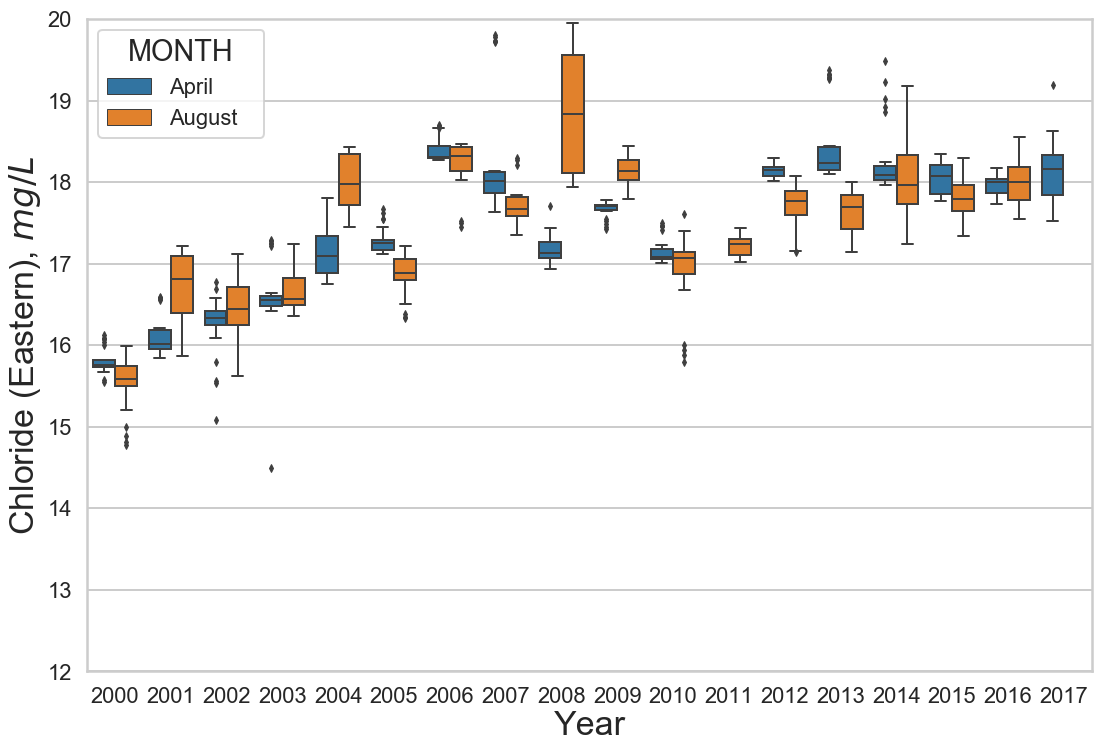

In [45]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['STATION_ID'].isin(eastern_basin))] )
# plt.ylim(0,50)
plt.ylabel('Chloride (Eastern), $mg/L$')
plt.xlabel('Year')
plt.ylim(12,20)

In [46]:
df[(df['VALUE_1']>0)& (df['STATION_ID'].isin(eastern_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('eastern_glenda_Cl_mg_L.csv')

#### PO4

In [47]:
df = pd.read_csv('../../measurements/GLNPO/GLENDA PO4.csv')

In [48]:
df['VALUE_1'] = pd.to_numeric(df['VALUE_1'], errors='coerce')

(0, 20)

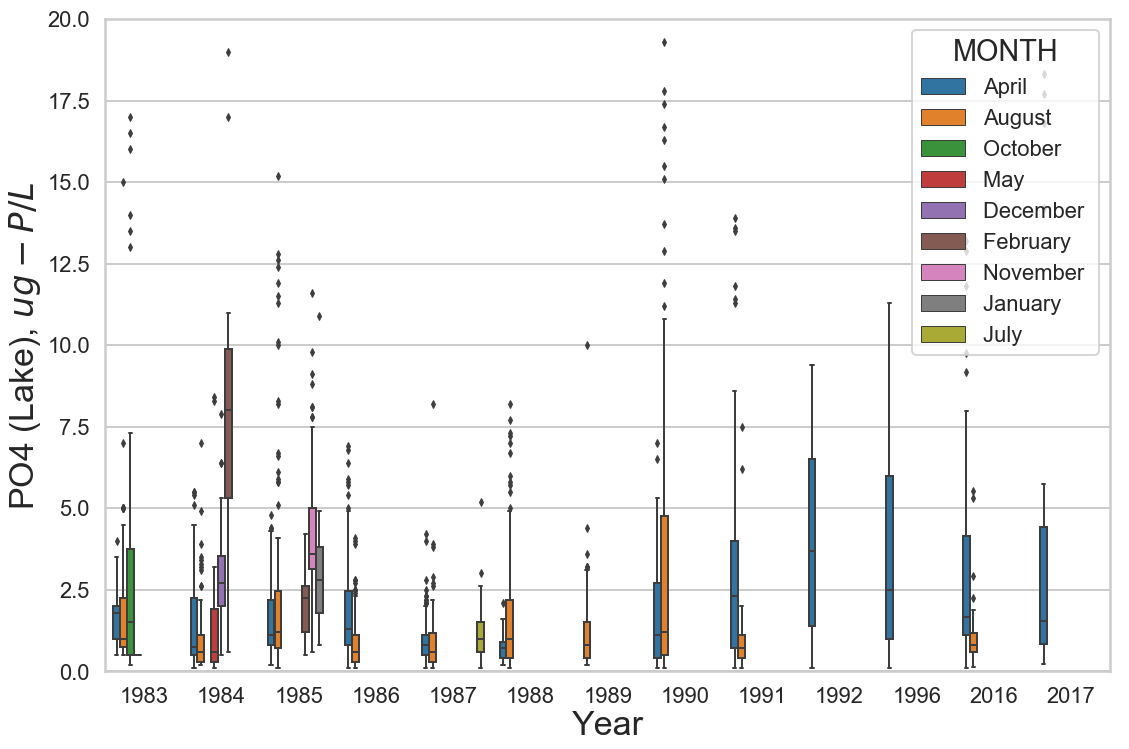

In [49]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0)] )
# plt.ylim(0,50)
plt.ylabel('PO4 (Lake), $ug-P/L$')
plt.xlabel('Year')
plt.ylim(0,20)

In [50]:
df[(df['VALUE_1']>0)].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe()

count      mean        std     min     25%     50%     75%  \
YEAR MONTH                                                                   
1983 April       77.0  1.833766   0.833921  0.5000  1.0000  1.8000  2.0000   
     August      95.0  1.931579   1.992820  0.5000  0.7500  1.0000  2.2500   
     May         12.0  0.500000   0.000000  0.5000  0.5000  0.5000  0.5000   
     October     79.0  2.893671   3.885784  0.2000  0.5000  1.5000  3.7500   
1984 April       76.0  1.528947   1.389083  0.1000  0.5000  0.7500  2.2500   
     August     132.0  0.965909   1.003492  0.2000  0.3000  0.6000  1.1000   
     December    88.0  2.850000   1.386553  0.5000  2.0000  2.7000  3.5250   
     February    16.0  7.931250   5.220692  0.6000  5.3000  8.0000  9.8750   
     May         38.0  1.407895   1.879819  0.1000  0.3000  0.6000  1.9000   
1985 April      141.0  1.520567   1.029113  0.2000  0.8000  1.1000  2.2000   
     August     207.0  4.479710  15.290862  0.1000  0.7000  1.2000  2.4500   
     February    18.0  2.033333   1.024408  0.5000  1.2000  2.2500  2.6000   
     January     17.0  3.141176   2.354798  0.8000  1.8000  2.8000  3.8000   
     November   115.0  4.241739   1.896626  0.6000  3.1500  3.6000  5.0000   
1986 April      138.0  1.898551   1.608553  0.1000  0.8000  1.3000  2.4750   
     August     169.0  0.816568   0.784954  0.1000  0.3000  0.6000  1.1000   
1987 April      189.0  0.903704   0.648104  0.1000  0.5000  0.8000  1.1000   
     August     118.0  0.899153   0.986966  0.1000  0.3000  0.6000  1.1750   
     July        69.0  1.186957   0.838050  0.1000  0.6000  1.0000  1.5000   
1988 April      123.0  0.708130   0.346314  0.2000  0.4000  0.7000  0.9000   
     August     155.0  1.652258   1.781628  0.1000  0.4000  1.0000  2.2000   
1989 August      80.0  1.173750   1.387352  0.2000  0.4000  0.8000  1.5000   
1990 April      123.0  1.660163   1.562508  0.1000  0.4000  1.1000  2.7000   
     August     186.0  3.996774   6.042068  0.1000  0.5000  1.2000  4.7500   
1991 April      129.0  3.013178   3.059575  0.1000  0.7000  2.3000  4.0000   
     August     201.0  0.764677   0.727802  0.1000  0.4000  0.7000  1.1000   
1992 April      133.0  4.009023   2.732311  0.1000  1.4000  3.7000  6.5000   
1996 April      207.0  3.288406   2.611970  0.1000  1.0000  2.5000  6.0000   
2016 April      100.0  2.835024   2.676271  0.0994  1.1200  1.6700  4.1600   
     August     106.0  0.991962   0.768891  0.1210  0.6025  0.8215  1.1875   
2017 April       96.0  2.890583   3.409094  0.2220  0.8265  1.5550  4.4225   

                   max  
YEAR MONTH              
1983 April        4.00  
     August      15.00  
     May          0.50  
     October     17.00  
1984 April        5.50  
     August       7.00  
     December     7.90  
     February    19.00  
     May          8.40  
1985 April        4.80  
     August     173.50  
     February     4.20  
     January     10.90  
     November    11.60  
1986 April        6.90  
     August       4.10  
1987 April        4.20  
     August       8.20  
     July         5.20  
1988 April        2.10  
     August       8.20  
1989 August      10.00  
1990 April        7.00  
     August      30.70  
1991 April       13.90  
     August       7.50  
1992 April        9.40  
1996 April       11.30  
2016 April       13.20  
     August       5.52  
2017 April       18.30

#### Temperature

In [51]:
df = pd.read_csv('../../measurements/GLNPO/GLENDA T.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (37,38,44,45,47,48,50,51,54,55,57,58,61,62,64,65,68,69,71,72,75,76,78,79,82,83,85,86,89,90,92,93,96,97,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
df.head()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,ANL_CODE_3,ANALYTE_3,VALUE_3,UNITS_3,FRACTION_3,METHOD_3,RESULT_REMARK_3,ANL_CODE_4,ANALYTE_4,VALUE_4,UNITS_4,FRACTION_4,METHOD_4,RESULT_REMARK_4,ANL_CODE_5,ANALYTE_5,VALUE_5,UNITS_5,FRACTION_5,METHOD_5,RESULT_REMARK_5,ANL_CODE_6,ANALYTE_6,VALUE_6,UNITS_6,FRACTION_6,METHOD_6,RESULT_REMARK_6,ANL_CODE_7,ANALYTE_7,VALUE_7,UNITS_7,FRACTION_7,METHOD_7,RESULT_REMARK_7,ANL_CODE_8,ANALYTE_8,VALUE_8,UNITS_8,FRACTION_8,METHOD_8,RESULT_REMARK_8,ANL_CODE_9,ANALYTE_9,VALUE_9,UNITS_9,FRACTION_9,METHOD_9,RESULT_REMARK_9,ANL_CODE_10,ANALYTE_10,VALUE_10,UNITS_10,FRACTION_10,METHOD_10,RESULT_REMARK_10,ANL_CODE_11,ANALYTE_11,VALUE_11,UNITS_11,FRACTION_11,METHOD_11,RESULT_REMARK_11,ANL_CODE_12,ANALYTE_12,VALUE_12,UNITS_12,FRACTION_12,METHOD_12,RESULT_REMARK_12,Unnamed: 103
0,1,2000,August,Summer,Erie,SU2000,E061G00,ER61,9.0,41.946183,-83.045033,2000/08/02 22:14,EDT,7.234,Bottom Minus 1,surface water,Individual,lab duplicate,00GC40C11,Temp,Temperature,No result recorded.,C,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2000,August,Summer,Erie,SU2000,E091G00,ER91M,10.1,41.841500,-82.917200,2000/08/03 05:58,EDT,8.168,Bottom Minus 1,surface water,Individual QC,field duplicate,00GC40D91,Temp,Temperature,No result recorded.,C,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2000,August,Summer,Erie,SU2000,E061G00,ER61,9.0,41.946183,-83.045033,2000/08/02 22:14,EDT,0.000,"Integrated, Summer",surface water,Composite,routine field sample,00GC40I12,Temp,Temperature,No result recorded.,C,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2000,August,Summer,Erie,SU2000,E060G00,ER60,8.1,41.891433,-83.196700,2000/08/03 00:45,EDT,0.000,"Integrated, Summer",surface water,Composite,routine field sample,00GC40I32,Temp,Temperature,No result recorded.,C,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2000,August,Summer,Erie,SU2000,E059G00,ER59,7.8,41.726333,-83.151033,2000/08/03 02:20,EDT,0.000,"Integrated, Summer",surface water,Composite,routine field sample,00GC40I52,Temp,Temperature,No result recorded.,C,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.groupby(['STATION_ID']).count()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,ANL_CODE_3,ANALYTE_3,VALUE_3,UNITS_3,FRACTION_3,METHOD_3,RESULT_REMARK_3,ANL_CODE_4,ANALYTE_4,VALUE_4,UNITS_4,FRACTION_4,METHOD_4,RESULT_REMARK_4,ANL_CODE_5,ANALYTE_5,VALUE_5,UNITS_5,FRACTION_5,METHOD_5,RESULT_REMARK_5,ANL_CODE_6,ANALYTE_6,VALUE_6,UNITS_6,FRACTION_6,METHOD_6,RESULT_REMARK_6,ANL_CODE_7,ANALYTE_7,VALUE_7,UNITS_7,FRACTION_7,METHOD_7,RESULT_REMARK_7,ANL_CODE_8,ANALYTE_8,VALUE_8,UNITS_8,FRACTION_8,METHOD_8,RESULT_REMARK_8,ANL_CODE_9,ANALYTE_9,VALUE_9,UNITS_9,FRACTION_9,METHOD_9,RESULT_REMARK_9,ANL_CODE_10,ANALYTE_10,VALUE_10,UNITS_10,FRACTION_10,METHOD_10,RESULT_REMARK_10,ANL_CODE_11,ANALYTE_11,VALUE_11,UNITS_11,FRACTION_11,METHOD_11,RESULT_REMARK_11,ANL_CODE_12,ANALYTE_12,VALUE_12,UNITS_12,FRACTION_12,METHOD_12,RESULT_REMARK_12,Unnamed: 103
STATION_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ER01,3,3,3,3,3,0,3,3,3,3,3,3,0,0,3,3,0,3,3,3,3,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ER09,580,580,580,554,580,322,580,336,336,336,580,580,526,544,580,580,547,580,580,580,580,580,570,276,0,23,23,23,23,23,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,2,2,2,2,2,0,0,0
ER09H8501,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ER09H8502,2,2,2,0,2,0,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ER10,482,482,482,475,482,308,482,321,321,321,482,482,432,448,482,482,452,482,482,482,482,482,473,191,1,21,21,21,21,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ER15H,2,2,2,0,2,0,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ER15H8501,2,2,2,0,2,0,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ER15H8502,2,2,2,0,2,0,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ER15M,817,817,817,770,817,411,817,428,428,428,817,817,762,783,817,817,786,817,817,817,817,817,808,426,3,23,23,23,23,22,1,0,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df[df['STATION_ID']=='ER63'].groupby(['YEAR']).count()

,Row,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,ANL_CODE_3,ANALYTE_3,VALUE_3,UNITS_3,FRACTION_3,METHOD_3,RESULT_REMARK_3,ANL_CODE_4,ANALYTE_4,VALUE_4,UNITS_4,FRACTION_4,METHOD_4,RESULT_REMARK_4,ANL_CODE_5,ANALYTE_5,VALUE_5,UNITS_5,FRACTION_5,METHOD_5,RESULT_REMARK_5,ANL_CODE_6,ANALYTE_6,VALUE_6,UNITS_6,FRACTION_6,METHOD_6,RESULT_REMARK_6,ANL_CODE_7,ANALYTE_7,VALUE_7,UNITS_7,FRACTION_7,METHOD_7,RESULT_REMARK_7,ANL_CODE_8,ANALYTE_8,VALUE_8,UNITS_8,FRACTION_8,METHOD_8,RESULT_REMARK_8,ANL_CODE_9,ANALYTE_9,VALUE_9,UNITS_9,FRACTION_9,METHOD_9,RESULT_REMARK_9,ANL_CODE_10,ANALYTE_10,VALUE_10,UNITS_10,FRACTION_10,METHOD_10,RESULT_REMARK_10,ANL_CODE_11,ANALYTE_11,VALUE_11,UNITS_11,FRACTION_11,METHOD_11,RESULT_REMARK_11,ANL_CODE_12,ANALYTE_12,VALUE_12,UNITS_12,FRACTION_12,METHOD_12,RESULT_REMARK_12,Unnamed: 103
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1985,29,29,22,29,0,29,29,0,0,0,29,29,29,29,29,29,29,29,29,29,29,29,29,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,19,19,19,19,0,19,19,0,0,0,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,25,25,25,25,0,25,25,0,0,0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988,22,22,22,22,0,22,22,0,0,0,22,22,22,22,22,22,22,22,22,22,22,22,22,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1989,14,14,14,14,0,14,14,0,0,0,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990,22,22,22,22,0,22,22,0,0,0,22,22,22,22,22,22,22,22,22,22,22,22,22,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991,22,22,22,22,0,22,22,0,0,0,22,22,22,22,22,22,22,22,22,22,22,22,22,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1992,8,8,8,8,0,8,8,0,0,0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1993,8,8,8,8,0,8,8,0,0,0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df[df['STATION_ID']=='ER15M'].groupby(['YEAR']).count()


,Row,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,ANL_CODE_3,ANALYTE_3,VALUE_3,UNITS_3,FRACTION_3,METHOD_3,RESULT_REMARK_3,ANL_CODE_4,ANALYTE_4,VALUE_4,UNITS_4,FRACTION_4,METHOD_4,RESULT_REMARK_4,ANL_CODE_5,ANALYTE_5,VALUE_5,UNITS_5,FRACTION_5,METHOD_5,RESULT_REMARK_5,ANL_CODE_6,ANALYTE_6,VALUE_6,UNITS_6,FRACTION_6,METHOD_6,RESULT_REMARK_6,ANL_CODE_7,ANALYTE_7,VALUE_7,UNITS_7,FRACTION_7,METHOD_7,RESULT_REMARK_7,ANL_CODE_8,ANALYTE_8,VALUE_8,UNITS_8,FRACTION_8,METHOD_8,RESULT_REMARK_8,ANL_CODE_9,ANALYTE_9,VALUE_9,UNITS_9,FRACTION_9,METHOD_9,RESULT_REMARK_9,ANL_CODE_10,ANALYTE_10,VALUE_10,UNITS_10,FRACTION_10,METHOD_10,RESULT_REMARK_10,ANL_CODE_11,ANALYTE_11,VALUE_11,UNITS_11,FRACTION_11,METHOD_11,RESULT_REMARK_11,ANL_CODE_12,ANALYTE_12,VALUE_12,UNITS_12,FRACTION_12,METHOD_12,RESULT_REMARK_12,Unnamed: 103
YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1983,65,65,47,65,0,65,65,0,0,0,65,65,65,65,65,65,65,65,65,65,65,65,65,65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,65,65,49,65,0,65,65,0,0,0,65,65,65,65,65,65,65,65,65,65,65,65,65,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,45,45,32,45,0,45,45,0,0,0,45,45,45,45,45,45,45,45,45,45,45,45,45,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,32,32,32,32,0,32,32,0,0,0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,39,39,39,39,0,39,39,0,0,0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988,32,32,32,32,0,32,32,0,0,0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1989,16,16,16,16,0,16,16,0,0,0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990,32,32,32,32,0,32,32,0,0,0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991,31,31,31,31,0,31,31,0,0,0,31,31,31,31,31,31,31,31,31,31,31,31,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df['VALUE_1'] = pd.to_numeric(df['VALUE_1'], errors='coerce')

(0, 32)

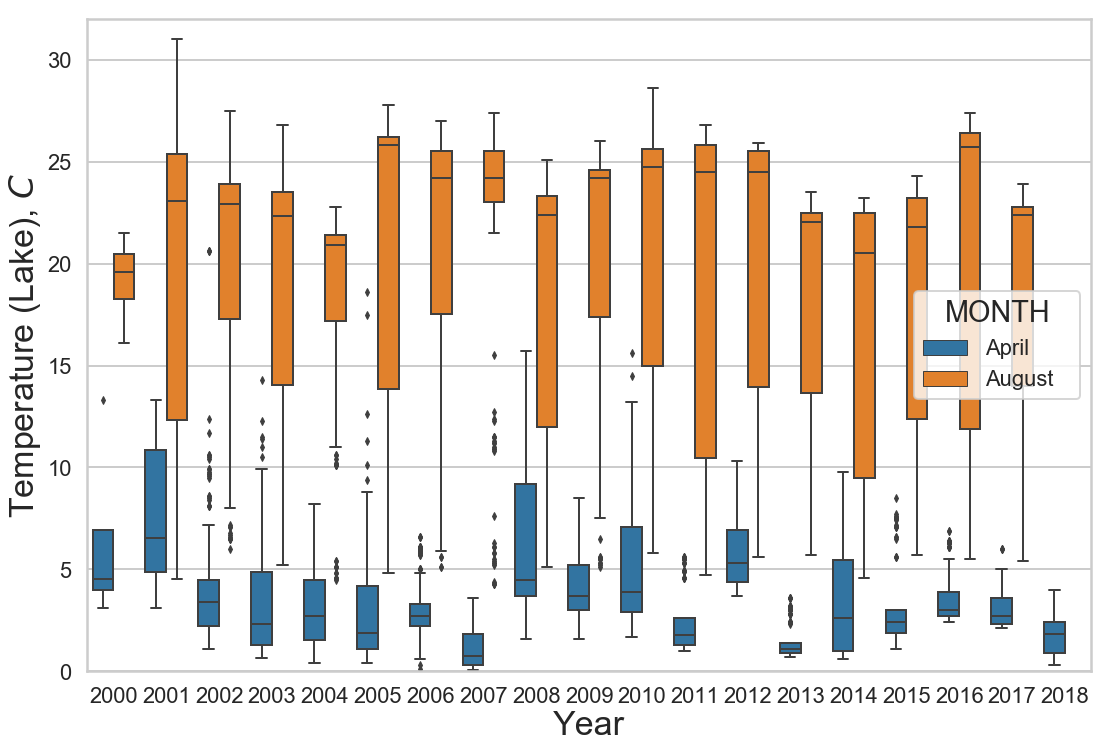

In [57]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999)] )
# plt.ylim(0,50)
plt.ylabel('Temperature (Lake), $C$')
plt.xlabel('Year')
plt.ylim(0,32)

In [58]:
df[(df['VALUE_1']>0)].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('lake_glenda_T_C.csv')

(0, 32)

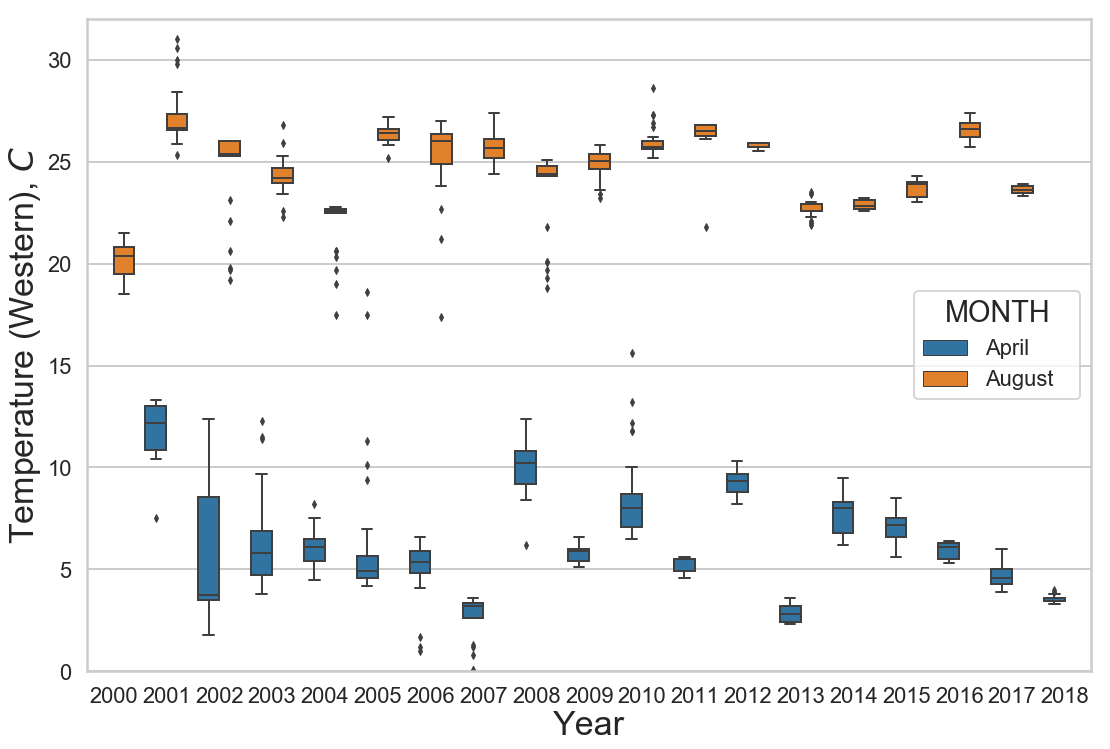

In [59]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['YEAR']>1999) & (df['STATION_ID'].isin(western_basin))] )
# plt.ylim(0,50)
plt.ylabel('Temperature (Western), $C$')
plt.xlabel('Year')
plt.ylim(0,32)

In [60]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(western_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('western_glenda_T_C.csv')

(0, 32)

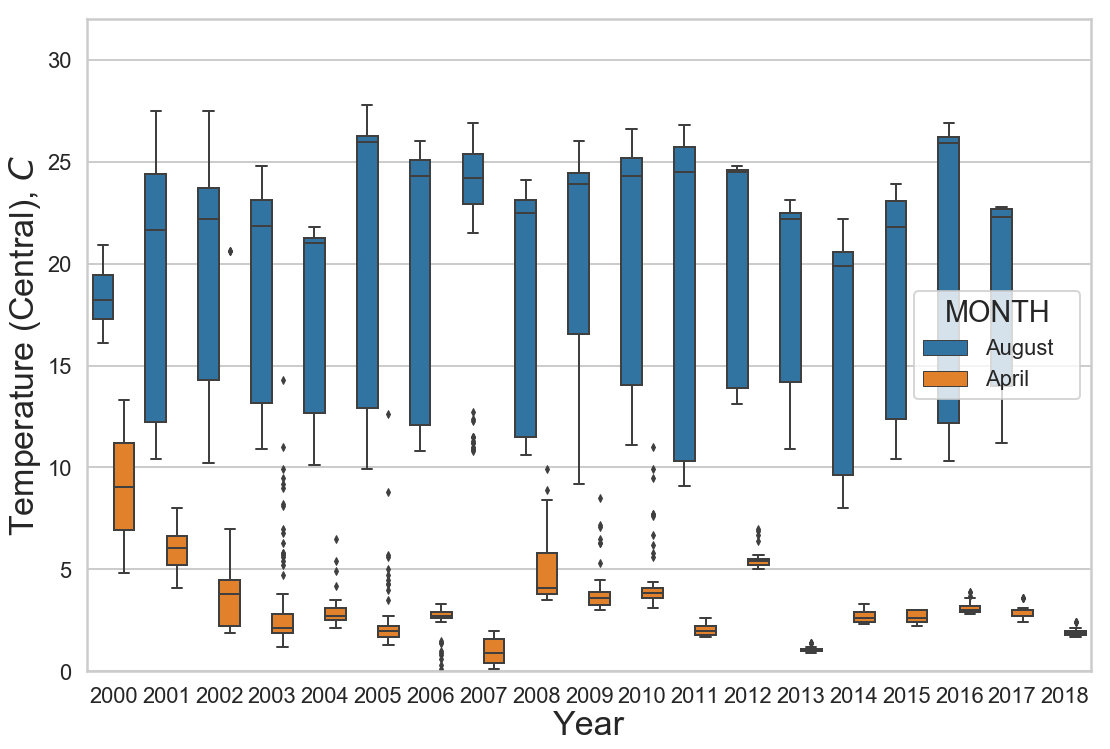

In [61]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['YEAR']>1999) & (df['STATION_ID'].isin(central_basin))] )
# plt.ylim(0,50)
plt.ylabel('Temperature (Central), $C$')
plt.xlabel('Year')
plt.ylim(0,32)

In [62]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(central_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('central_glenda_T_C.csv')

(0, 32)

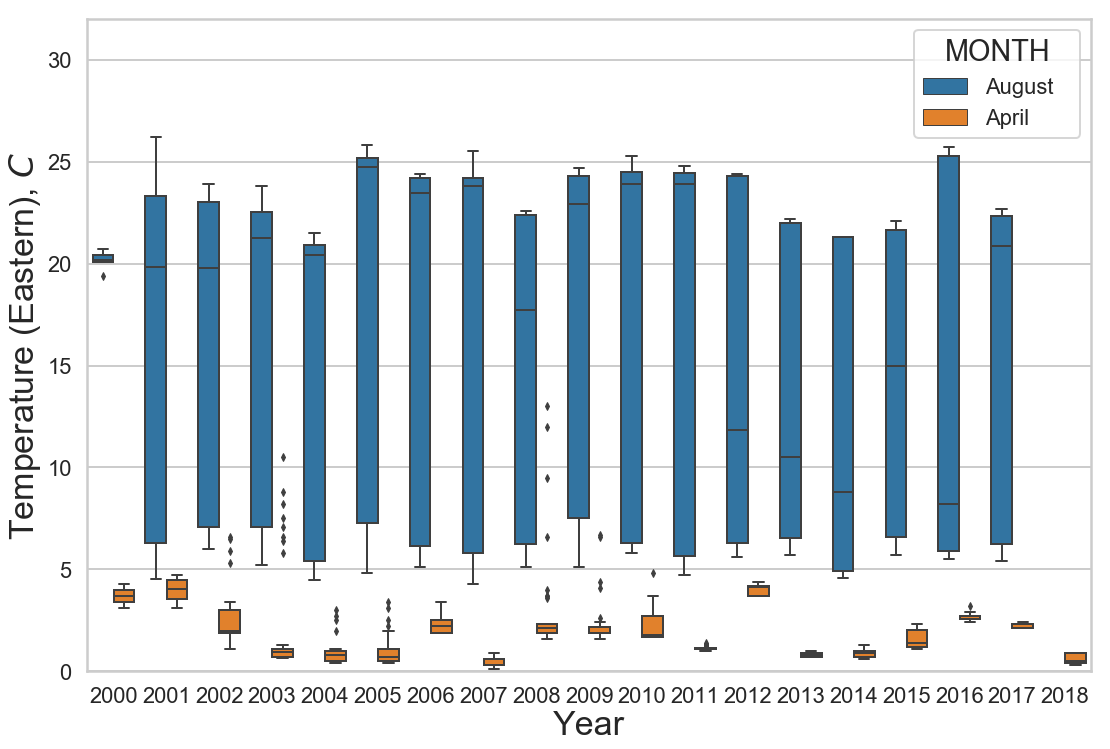

In [63]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['YEAR']>1999) & (df['STATION_ID'].isin(eastern_basin))] )
# plt.ylim(0,50)
plt.ylabel('Temperature (Eastern), $C$')
plt.xlabel('Year')
plt.ylim(0,32)

In [64]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(eastern_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('eastern_glenda_T_C.csv')

### NO3+NO2

In [65]:
df = pd.read_csv('../../measurements/GLNPO/GLENDA NO2NO3.csv')
df['VALUE_1'] = pd.to_numeric(df['VALUE_1'], errors='coerce')

In [66]:
df.head()

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STATION_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,SAMPLING_DATE,TIME_ZONE,SAMPLE_DEPTH_M,DEPTH_CODE,MEDIUM,SAMPLE_TYPE,QC_TYPE,SAMPLE_ID,ANL_CODE_1,ANALYTE_1,VALUE_1,UNITS_1,FRACTION_1,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,Unnamed: 33
0,1,2000,April,Spring,Erie,SP2000,E058A00,ER58,9.3,41.684917,-82.933833,2000/04/15 13:57,EDT,4.0,NaN,surface water,Individual QC,lab duplicate,00GC10C63,NO2+NO3,"Nitrogen, Total Oxidized",0.923,mg/l,Total/Bulk,LG203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2000,April,Spring,Erie,SP2000,E059A00,ER59,7.9,41.727317,-83.150050,2000/04/15 12:35,EDT,4.0,NaN,surface water,Individual QC,field duplicate,00GC10D43,NO2+NO3,"Nitrogen, Total Oxidized",1.536,mg/l,Total/Bulk,LG203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2000,April,Spring,Erie,SP2000,E061A00,ER61,9.1,41.946550,-83.045100,2000/04/15 08:43,EDT,2.0,NaN,surface water,Composite,routine field sample,00GC10I12,NO2+NO3,"Nitrogen, Total Oxidized",1.470,mg/l,Total/Bulk,LG203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2000,April,Spring,Erie,SP2000,E060A00,ER60,8.3,41.891233,-83.197167,2000/04/15 11:11,EDT,2.0,NaN,surface water,Composite,routine field sample,00GC10I32,NO2+NO3,"Nitrogen, Total Oxidized",0.402,mg/l,Total/Bulk,LG203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2000,April,Spring,Erie,SP2000,E059A00,ER59,7.9,41.727317,-83.150050,2000/04/15 12:35,EDT,2.0,NaN,surface water,Composite,routine field sample,00GC10I52,NO2+NO3,"Nitrogen, Total Oxidized",1.540,mg/l,Total/Bulk,LG203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0, 2)

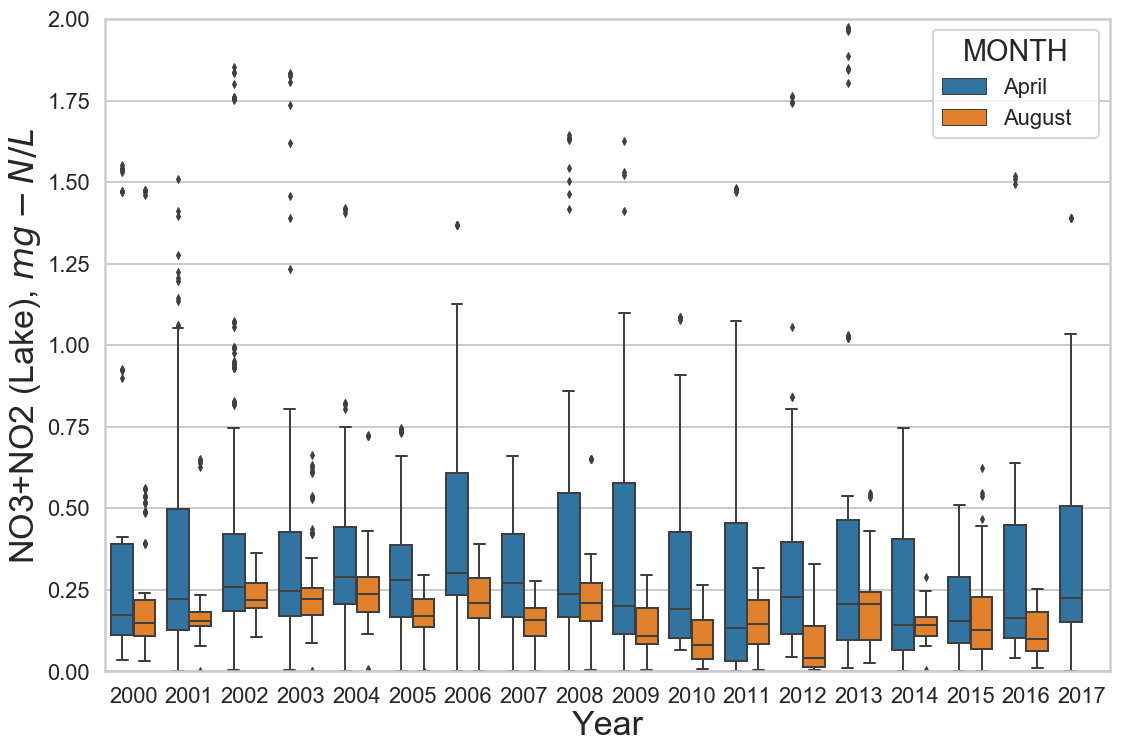

In [67]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999)])
# plt.ylim(0,50)
plt.ylabel('NO3+NO2 (Lake), $mg-N/L$')
plt.xlabel('Year')
plt.ylim(0,2)

In [68]:
df[(df['VALUE_1']>0)].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('lake_glenda_NO3NO2_mgN_L.csv')

In [69]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(eastern_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('eastern_glenda_NO3NO2_mgN_L.csv')

In [70]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(central_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('central_glenda_NO3NO2_mgN_L.csv')

In [71]:
df[(df['VALUE_1']>0) & (df['STATION_ID'].isin(western_basin))].groupby(['YEAR', 'MONTH'])['VALUE_1'].describe().to_csv('western_glenda_NO3NO2_mgN_L.csv')

(0, 3)

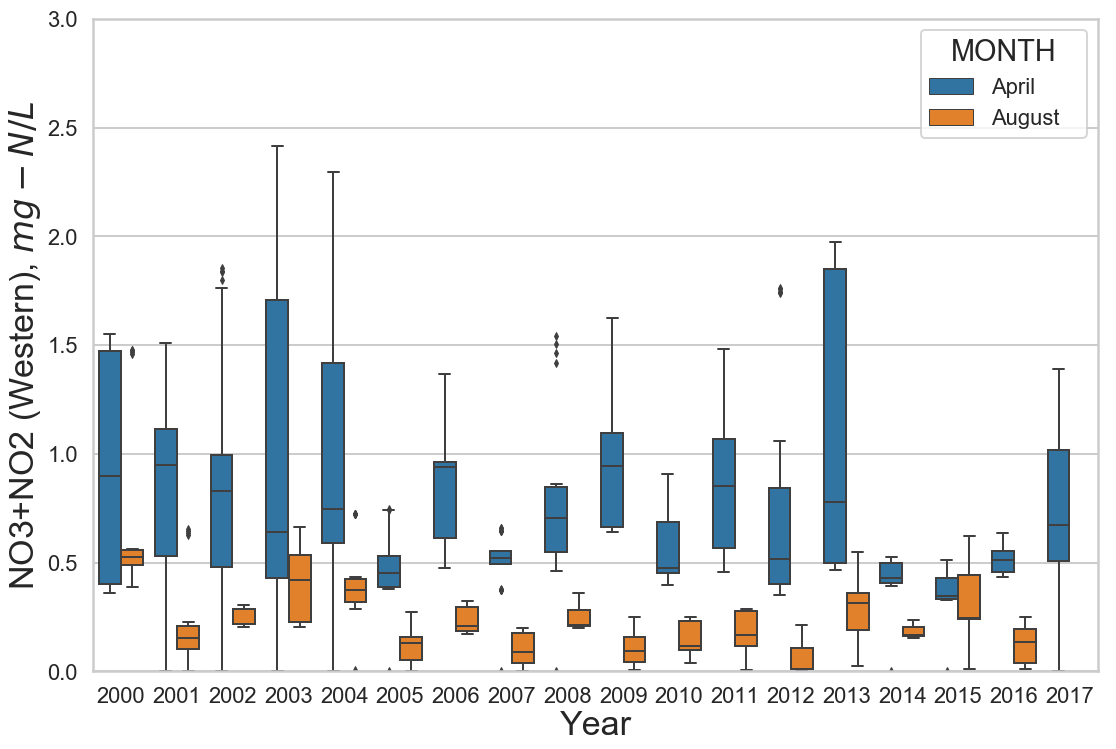

In [72]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['STATION_ID'].isin(western_basin))])
# plt.ylim(0,50)
plt.ylabel('NO3+NO2 (Western), $mg-N/L$')
plt.xlabel('Year')
plt.ylim(0,3)

(0, 0.5)

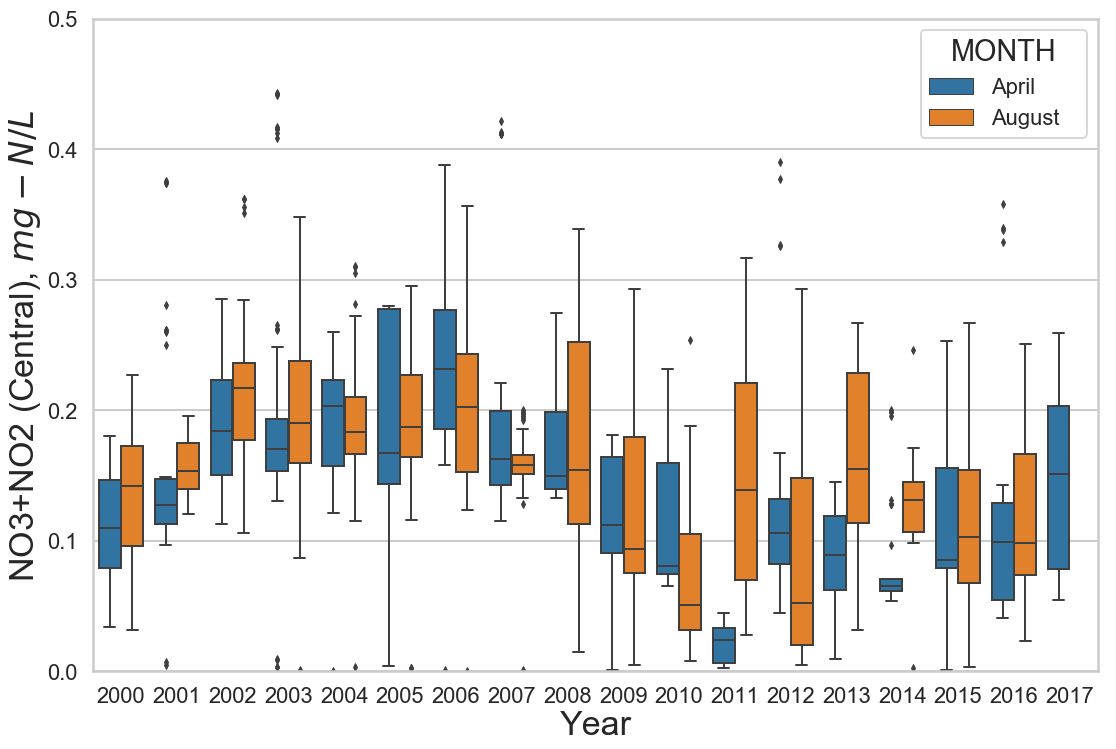

In [73]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['STATION_ID'].isin(central_basin))])
# plt.ylim(0,50)
plt.ylabel('NO3+NO2 (Central), $mg-N/L$')
plt.xlabel('Year')
plt.ylim(0,0.5)

(0, 0.5)

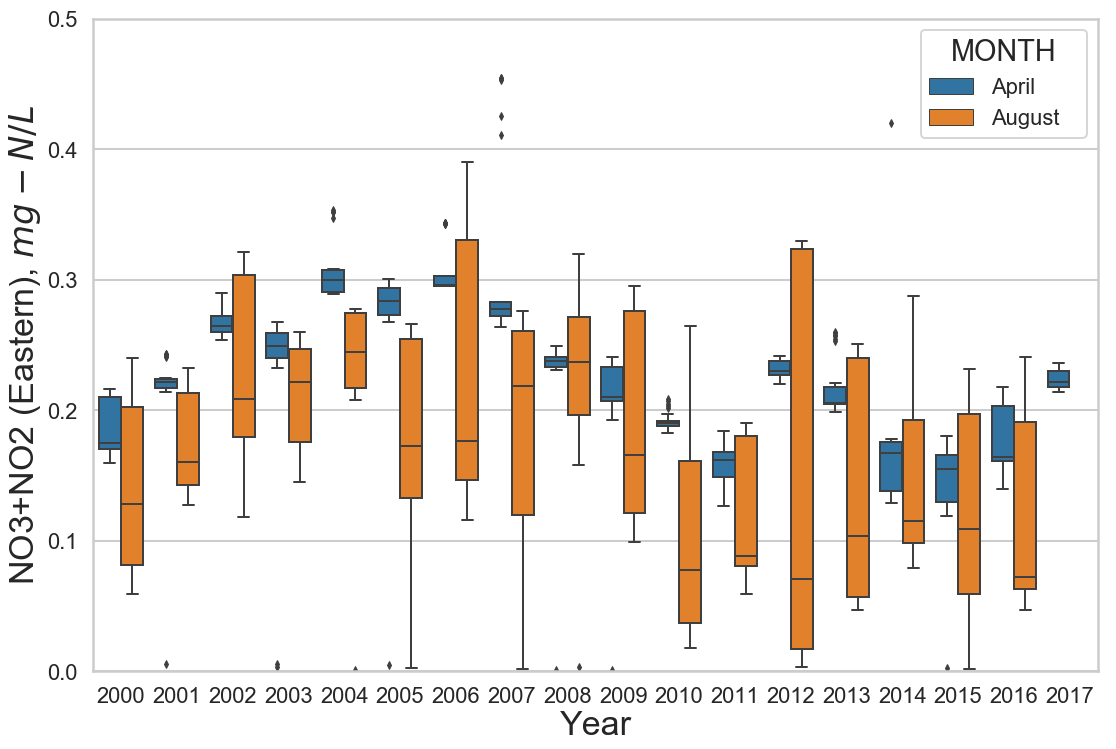

In [74]:
sns.boxplot(x='YEAR', y='VALUE_1', hue='MONTH', data=df[(df['VALUE_1']>0) & (df['YEAR']>1999) & (df['STATION_ID'].isin(eastern_basin))])
# plt.ylim(0,50)
plt.ylabel('NO3+NO2 (Eastern), $mg-N/L$')
plt.xlabel('Year')
plt.ylim(0,0.5)